## 라이브러리 설치 및 선언

In [1]:
!pip install -q finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 976.0 kB/s eta 0:00:00


In [2]:
import FinanceDataReader as fdr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## FinaceDataReader

In [3]:
# stock_list = fdr.StockListing('NASDAQ')
# stock_list

In [4]:
stock_list = fdr.StockListing('KRX')
stock_list.head()

Code        ISU_CD      Name Market Dept   Close ChangeCode  Changes  \
0  005930  KR7005930003      삼성전자  KOSPI        77200          1     1300   
1  000660  KR7000660001    SK하이닉스  KOSPI       201500          1     2900   
2  373220  KR7373220003  LG에너지솔루션  KOSPI       364500          1     8500   
3  005380  KR7005380001       현대차  KOSPI       265500          2    -2000   
4  207940  KR7207940008  삼성바이오로직스  KOSPI       755000          1     4000   

   ChagesRatio    Open    High     Low    Volume         Amount  \
0         1.71   75300   78200   74000  43825202  3306633382624   
1         1.46  203500  209000  199100   4774882   978796178200   
2         2.39  357000  366000  355500    157232    56613586500   
3        -0.75  267500  271500  262000   1011436   269789658500   
4         0.53  754000  759000  746000     44353    33317437000   

            Marcap      Stocks MarketId  
0  460867212860000  5969782550      STK  
1  146692476547500   728002365      STK  
2   85293000000000   234000000      STK  
3   55599998710500   209416191      STK  
4   53736370000000    71174000      STK

In [5]:
# 동일한 기업의 다른 종목들을 모두 가져오기
name = input('확인하고 싶은 회사명을 입력해주세요 : ')
name_contain_data = stock_list.loc[stock_list['Name'].str.contains(name)]
name_contain_data

확인하고 싶은 회사명을 입력해주세요 : 카카오


Code        ISU_CD    Name         Market   Dept  Close ChangeCode  \
18   035720  KR7035720002     카카오          KOSPI         45850          1   
37   323410  KR7323410001   카카오뱅크          KOSPI         23300          1   
87   377300  KR7377300009   카카오페이          KOSPI         33600          1   
174  293490  KR7293490009  카카오게임즈  KOSDAQ GLOBAL  우량기업부  21800          1   

     Changes  ChagesRatio   Open   High    Low   Volume       Amount  \
18      1400         3.15  44600  46600  44550  1500538  68766192400   
37       650         2.87  22700  23400  22650   666095  15402025400   
87      1450         4.51  32100  33650  32050   265166   8784063400   
174      150         0.69  21700  21950  21400   173988   3770594100   

             Marcap     Stocks MarketId  
18   20326505582250  443326185      STK  
37   11112262492100  476921137      STK  
87    4520155752000  134528445      STK  
174   1801339602600   82630257      KSQ

In [6]:
# 입력한 회사명과 동일한 것만 가져오기
name = input('확인하고 싶은 회사명을 입력해주세요 : ')
filter_data = stock_list.loc[stock_list['Name'] == name]
filter_data

확인하고 싶은 회사명을 입력해주세요 : 카카오


Code        ISU_CD Name Market Dept  Close ChangeCode  Changes  \
18  035720  KR7035720002  카카오  KOSPI       45850          1     1400   

    ChagesRatio   Open   High    Low   Volume       Amount          Marcap  \
18         3.15  44600  46600  44550  1500538  68766192400  20326505582250   

       Stocks MarketId  
18  443326185      STK

In [7]:
# APPL주가 정보 가져오기

df = fdr.DataReader('AAPL', '2021', '2024-03-29')   # 코드, 시작날짜, 종료 날짜
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  126.830055   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.398178   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.076103   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.309952   
2021-01-08  132.429993  132.630005  130.229996  132.050003  129.417450   
...                ...         ...         ...         ...         ...   
2024-03-22  171.759995  173.050003  170.059998  172.279999  172.046646   
2024-03-25  170.570007  171.940002  169.449997  170.850006  170.618591   
2024-03-26  170.000000  171.419998  169.580002  169.710007  169.480133   
2024-03-27  170.410004  173.600006  170.110001  173.309998  173.075241   
2024-03-28  171.750000  172.229996  170.509995  171.479996  171.247726   

               Volume  
Date                   
2021-01-04  143301900  
2021-01-05   97664900  
2021-01-06  155088000  
2021-01-07  109578200  
2021-01-08  105158200  
...               ...  
2024-03-22   71106600  
2024-03-25   54288300  
2024-03-26   57388400  
2024-03-27   60273300  
2024-03-28   65672700  

[814 rows x 6 columns]

<Axes: xlabel='Date'>

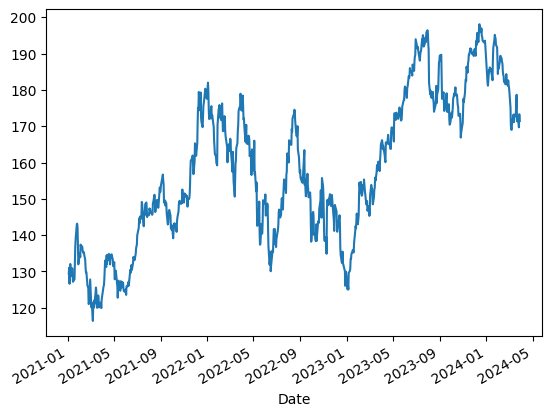

In [8]:
df.Close.plot()

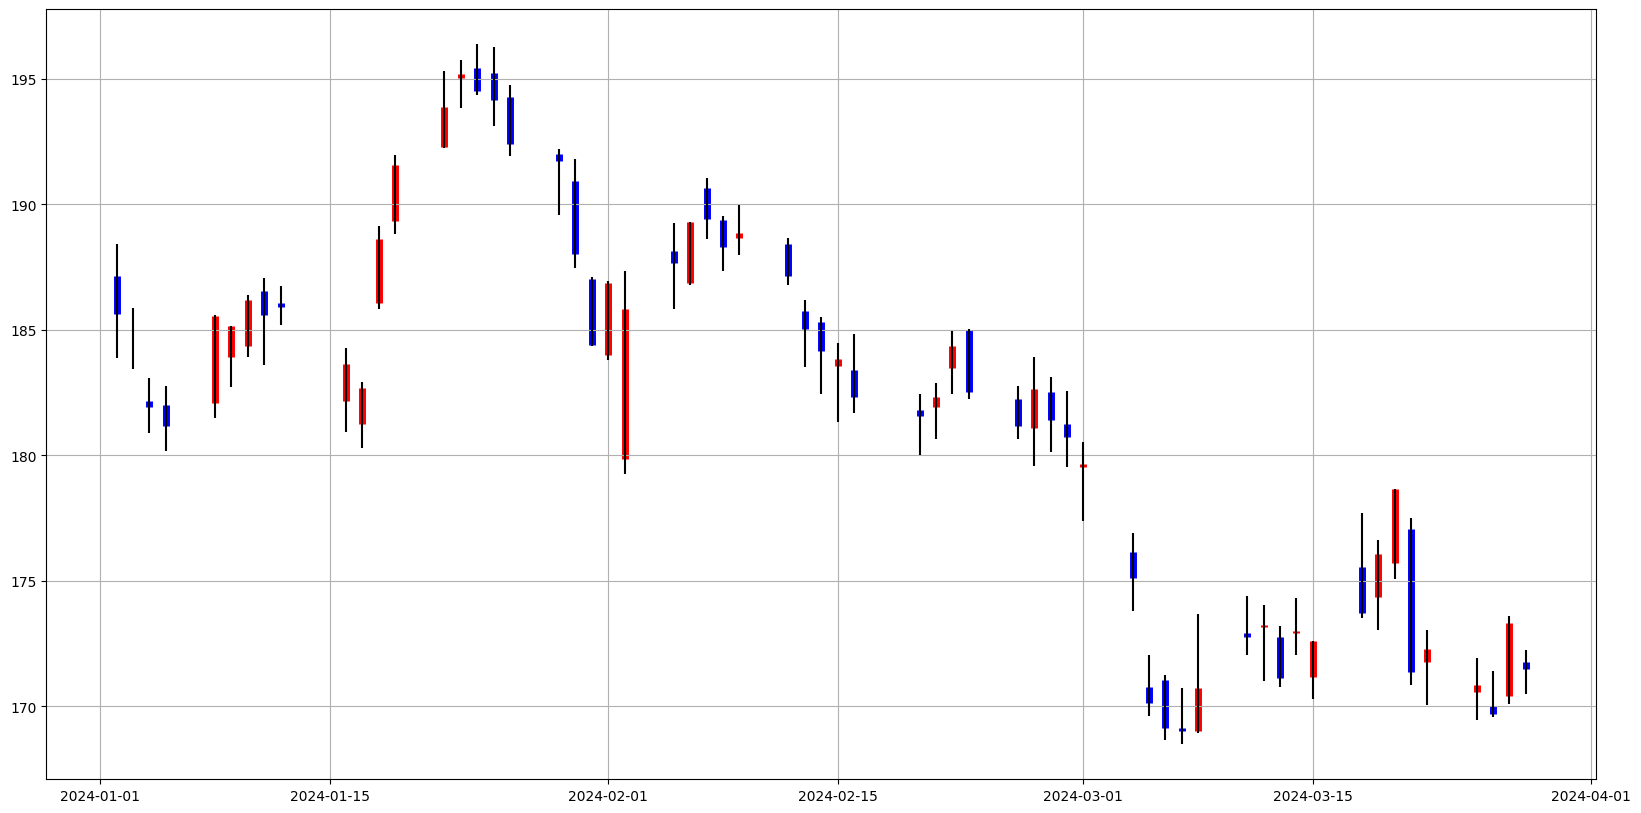

In [9]:
# 2024년 일봉 차트 그려보기 with matplotlib

df_2024 = df.loc[df.index > '2024']

plt.figure(figsize = (20, 10))

# sns.scatterplot(data = df_2024, x = df_2024.index, y = 'High', color = 'black')
# sns.scatterplot(data = df_2024, x = df_2024.index, y = 'Low', color = 'black')

plt.vlines(x = df_2024.index, ymin = df_2024['Low'], ymax = df_2024['High'], color = 'black')

for idx in range(len(df_2024.index)):
    if df_2024.iloc[idx]['Close'] > df_2024.iloc[idx]['Open']:
        plt.fill_between(x = [df_2024.index[idx]], y1 = df_2024.iloc[idx]['Close'], y2 = df_2024.iloc[idx]['Open'], color = 'red', linewidth = 5)
    else:
        plt.fill_between(x = [df_2024.index[idx]], y1 = df_2024.iloc[idx]['Close'], y2 = df_2024.iloc[idx]['Open'], color = 'blue', linewidth = 5)


plt.grid()
plt.show()

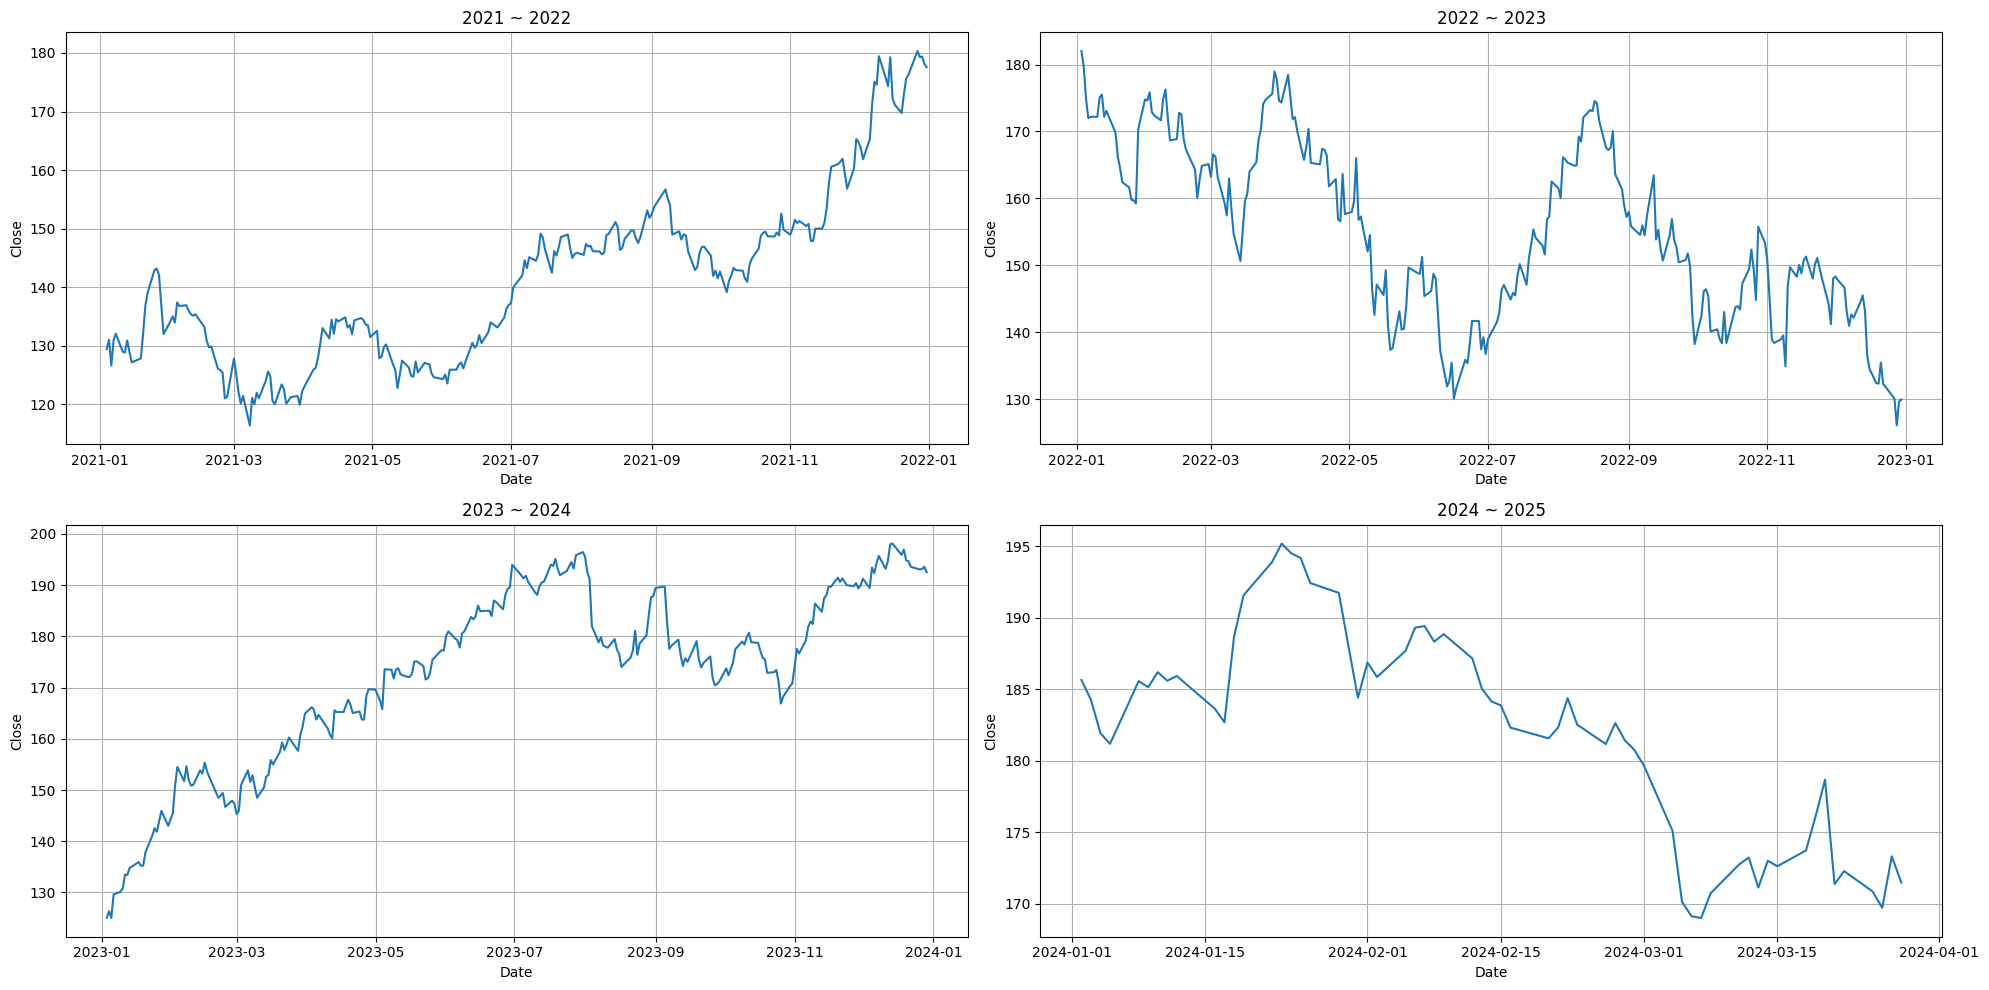

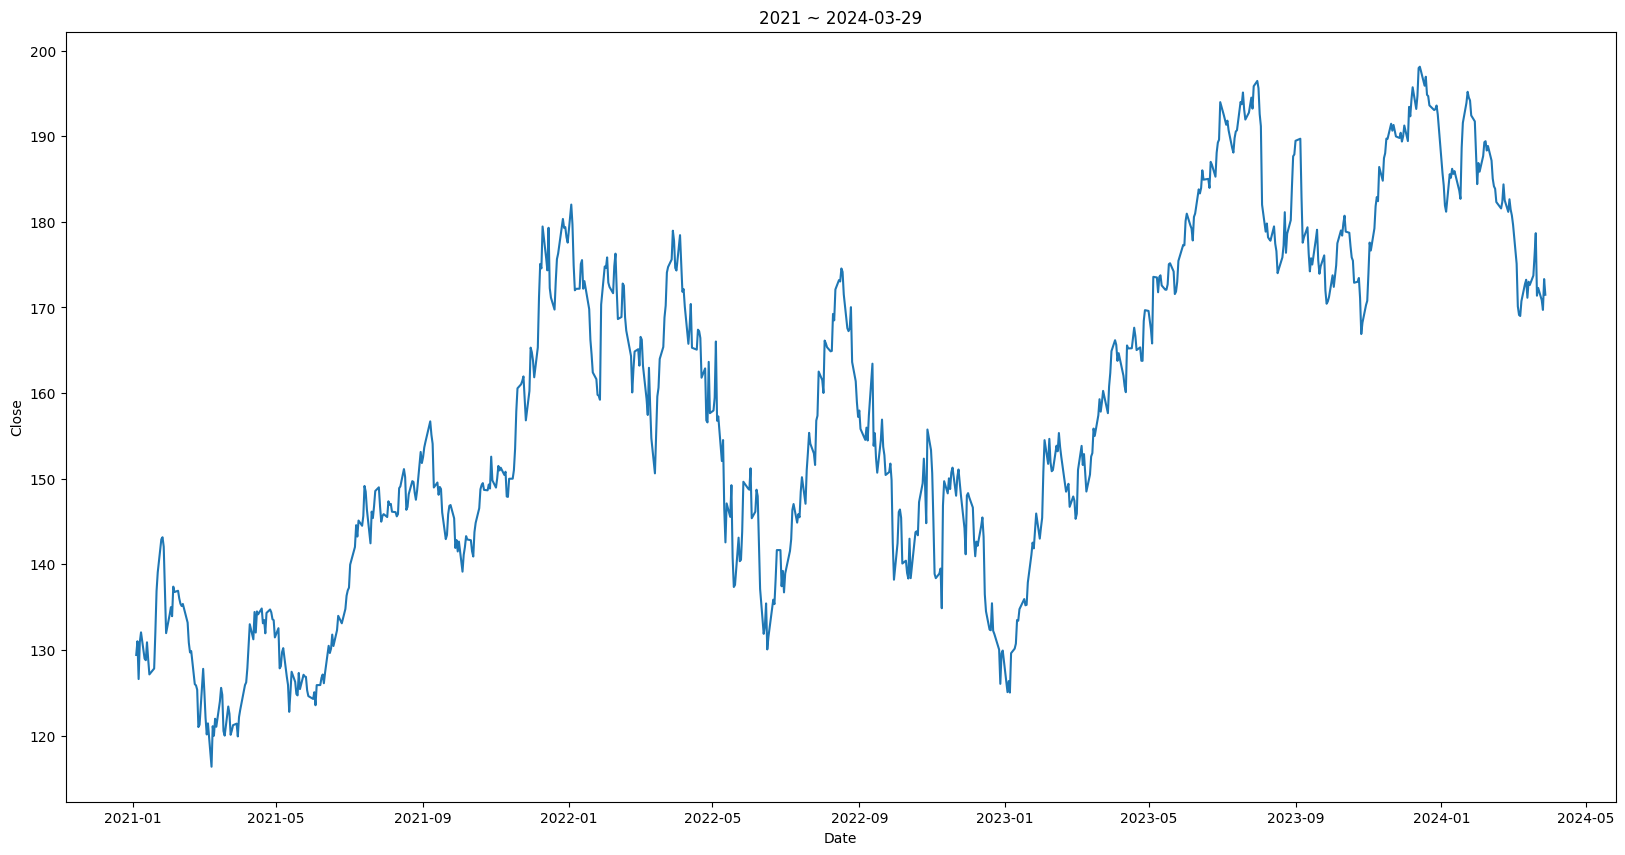

In [10]:
# 연도별 종가(Close) 시각화

plt.figure(figsize = (20, 10))

for idx, year in enumerate(['2021', '2022', '2023', '2024']):
    plt.subplot(2, 2, idx + 1)
    yearly_df = df.loc[(df.index > year) & (df.index < str(int(year) + 1)), 'Close']
    sns.lineplot(x = yearly_df.index, y = yearly_df)
    plt.title(f'{year} ~ {int(year) + 1}')
    plt.grid()

plt.tight_layout()

plt.figure(figsize = (20, 10))
sns.lineplot(data = df, x = df.index, y = df['Close'])
plt.title('2021 ~ 2024-03-29')
plt.show()

# 퀀트/주가 분석

## 지표를 이용한 거래 전략

### 1. 단순 이동 평균(Simple Moving Average, SMA) : 일정 기간동안의 평균 값

---


* 값.rolling(window = period).mean()
* 보통 단기(5, 10, 20)일, 중기(60)일, 장기(120, 200)일로 쓰임
> * 매수 신호 : 단기 이동 평균선 > 장기 이동 평균선
 * 매도 신호 : 단기 이동 평균선 < 장기 이동 평균선

---


 **5일, 10일선의 특징**
 > * 5일은 일주일 간의 변화, 10일은 2주간의 변화
* 단기대응선, 단기매매선 이라고 불림
* 주가가 강세인 경우 5일 이동 평균선이 10일 이동 평균선을 하향 돌파하지 않음
* 10일 이동 평균선은 5일 이동 평균선보다 후행으로한 움직임을 보이게 된다

**20일선의 특징**
> * 중기 매매선, 심리선, 생명선 등으로 불리는 매우 중요한 지표
* 20일선의 기울기를 기준으로 하락 방향으로 움직인다면 매도 전략 또는 매수 관망
* 20일선의 기울기를 기준으로 상승 방향으로 움직인다면 매수 전략 또는 매도 관망

**60일선의 특징**
> * 장기추세선 또는 경기선이라고 불리며, 6개월간의 평균 매매 가격을 의미

In [11]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  126.830055   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.398178   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.076103   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.309952   
2021-01-08  132.429993  132.630005  130.229996  132.050003  129.417450   
...                ...         ...         ...         ...         ...   
2024-03-22  171.759995  173.050003  170.059998  172.279999  172.046646   
2024-03-25  170.570007  171.940002  169.449997  170.850006  170.618591   
2024-03-26  170.000000  171.419998  169.580002  169.710007  169.480133   
2024-03-27  170.410004  173.600006  170.110001  173.309998  173.075241   
2024-03-28  171.750000  172.229996  170.509995  171.479996  171.247726   

               Volume  
Date                   
2021-01-04  143301900  
2021-01-05   97664900  
2021-01-06  155088000  
2021-01-07  109578200  
2021-01-08  105158200  
...               ...  
2024-03-22   71106600  
2024-03-25   54288300  
2024-03-26   57388400  
2024-03-27   60273300  
2024-03-28   65672700  

[814 rows x 6 columns]

In [12]:
# SMA_5, SMA_20, SMA_60, SMA_120 변수 생성

df['SMA_5'] = df['Close'].rolling(window = 5).mean()
df['SMA_20'] = df['Close'].rolling(window = 20).mean()
df['SMA_60'] = df['Close'].rolling(window = 60).mean()
df['SMA_120'] = df['Close'].rolling(window = 120).mean()

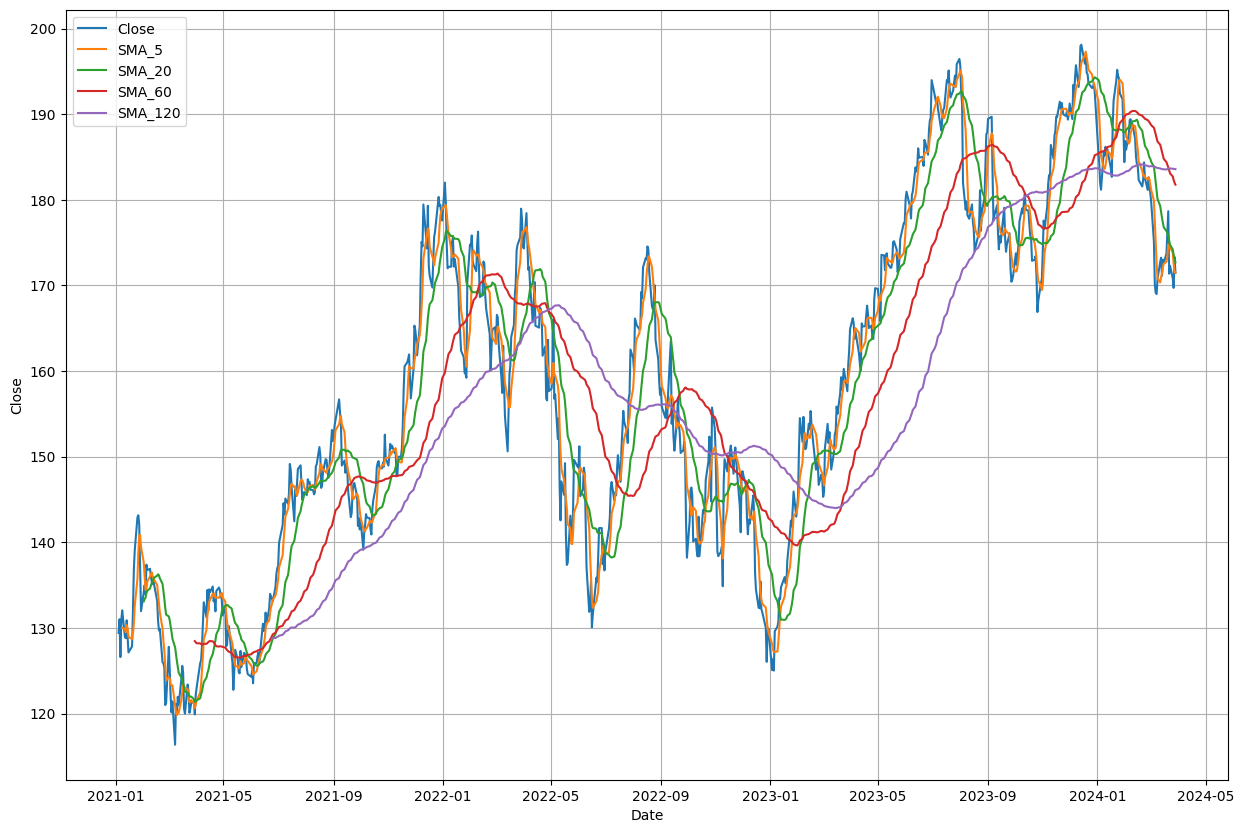

In [13]:
# 종가, SMA_5, SMA_20, SMA_60, SMA_120 시각화

plt.figure(figsize = (15, 10))

sns.lineplot(data = df, x = df.index, y = 'Close', label = 'Close')
sns.lineplot(data = df, x = df.index, y = 'SMA_5', label = 'SMA_5')
sns.lineplot(data = df, x = df.index, y = 'SMA_20', label = 'SMA_20')
sns.lineplot(data = df, x = df.index, y = 'SMA_60', label = 'SMA_60')
sns.lineplot(data = df, x = df.index, y = 'SMA_120', label = 'SMA_120')

plt.legend()
plt.grid()
plt.show()

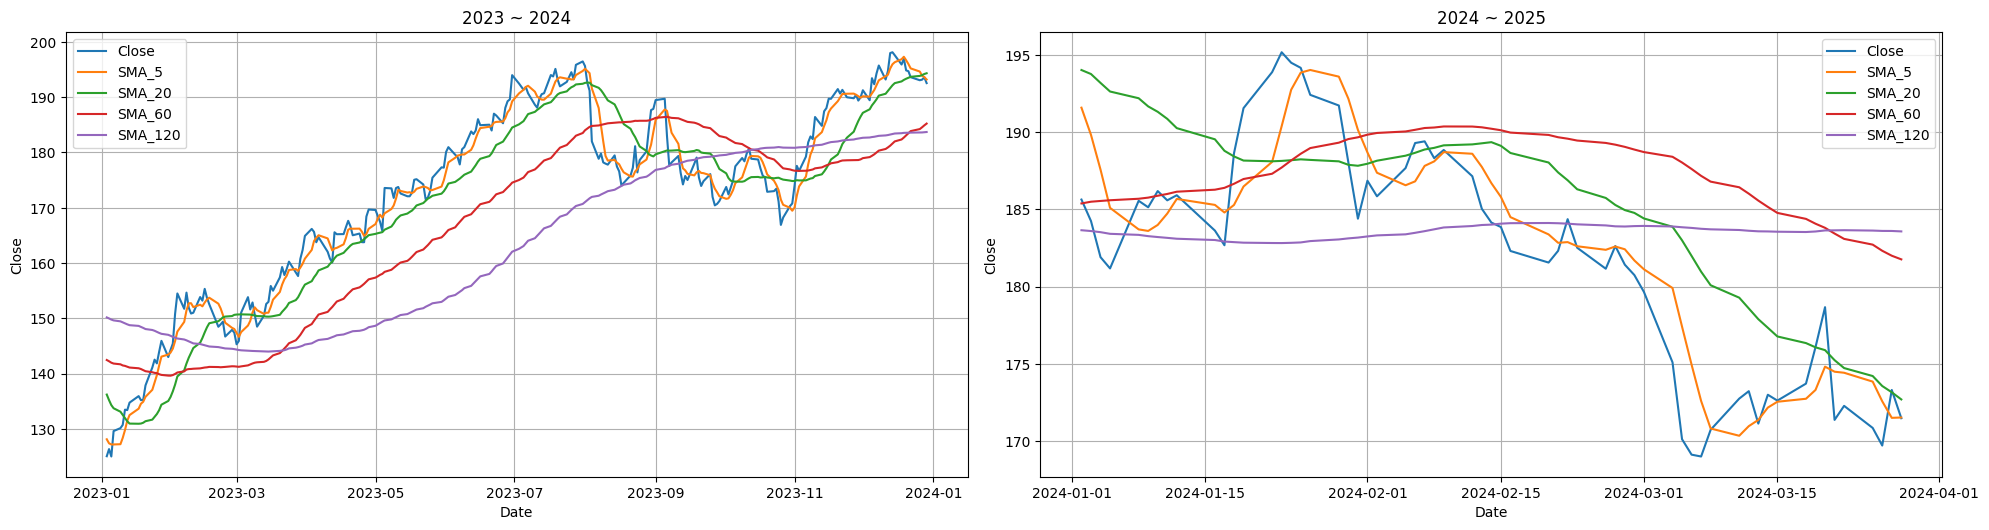

In [14]:
plt.figure(figsize = (20, 10))

for idx, year in enumerate(['2023', '2024']):
    plt.subplot(2, 2, idx + 1)
    yearly_df = df.loc[(df.index > year) & (df.index < str(int(year) + 1))]
    sns.lineplot(data = yearly_df, x = yearly_df.index, y = 'Close', label = 'Close')
    sns.lineplot(data = yearly_df, x = yearly_df.index, y = 'SMA_5', label = 'SMA_5')
    sns.lineplot(data = yearly_df, x = yearly_df.index, y = 'SMA_20', label = 'SMA_20')
    sns.lineplot(data = yearly_df, x = yearly_df.index, y = 'SMA_60', label = 'SMA_60')
    sns.lineplot(data = yearly_df, x = yearly_df.index, y = 'SMA_120', label = 'SMA_120')
    plt.title(f'{year} ~ {int(year) + 1}')
    plt.grid()

plt.tight_layout()
plt.show()

**5일 이동평균선과, 120일 이동평균선만을 토대로 답하기**

* Q1-1. 2023년 6월에는 해당 주식을 매수하기에 적합한가?
> A1-1 : 매수하기에 적합, 매도 관망
* Q1-2. 2023년 3월에 해당 주식을 보유하고 있다. 자료를 보고 처음 매도를 하기 좋은 시점은 어느 때인가?
> A1-2 : 7월 말

#### 볼린저 밴드(Bolinger Bands)


---

자료 참조 (https://m.blog.naver.com/PostList.naver?blogId=tkatk46&categoryNo=18&logCode=0)
* **Upper Band(상단 밴드)** = Mid Band(중간 밴드) + (2 * std)
* **Mid Band(중간 밴드)** = 20일 MA
* **Lower Band(하단 밴드)** = Mid Band(중간 밴드) - (2 * std)

**%b** : (Close - LowerBand) / (Upper Band - Lower Band)
- 주가가 Band 상 어디에 위치하고 있는지 나타내는 지표
- 상단에 걸치면 1.0, 중단 0.5, 하단 0.0
- %b > 0.8 매도 시점, %b < 0.2 매수 시점

**밴드 폭(Bolinger Bands Width)** = (Upper Band - Lower Band) / (Mid Band)
- 스퀴즈(변동성 흐름) 파악에 용이
- 주가 변동폭과 밴드 폭의 움직임 방향이 같다

In [15]:
# SMA_20_std, Upper_Band, Lower_Band 컬럼 생성

df['SMA_20_std'] = df['Close'].rolling(window = 20).std()
df['Upper_Band'] = df['SMA_20'] + (2 * df['SMA_20_std'])
df['Lower_Band'] = df['SMA_20'] - (2 * df['SMA_20_std'])

# pct_b 컬럼 생성
df['pct_b'] = (df['Close'] - df['Lower_Band']) / (df['Upper_Band'] - df['Lower_Band'])

# Band_Width 컬럼 생성
df['Band_Width'] = (df['Upper_Band'] - df['Lower_Band']) / (df['SMA_20'])

In [16]:
# sma_df
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-03-22  171.759995  173.050003  170.059998  172.279999  172.046646   
2024-03-25  170.570007  171.940002  169.449997  170.850006  170.618591   
2024-03-26  170.000000  171.419998  169.580002  169.710007  169.480133   
2024-03-27  170.410004  173.600006  170.110001  173.309998  173.075241   
2024-03-28  171.750000  172.229996  170.509995  171.479996  171.247726   

              Volume       SMA_5    SMA_20      SMA_60     SMA_120  \
Date                                                                 
2024-03-22  71106600  174.423999  174.7270  183.092666  183.655417   
2024-03-25  54288300  173.850000  174.2115  182.720999  183.631250   
2024-03-26  57388400  172.576001  173.5655  182.323166  183.608834   
2024-03-27  60273300  171.504001  173.1600  182.002833  183.605917   
2024-03-28  65672700  171.526001  172.6965  181.766833  183.577333   

            SMA_20_std  Upper_Band  Lower_Band     pct_b  Band_Width  
Date                                                                  
2024-03-22    4.430659  183.588319  165.865681  0.361928    0.101430  
2024-03-25    4.238401  182.688302  165.734697  0.301724    0.097316  
2024-03-26    3.855022  181.275545  165.855455  0.249969    0.088843  
2024-03-27    3.382978  179.925956  166.394044  0.511085    0.078147  
2024-03-28    2.887030  178.470561  166.922439  0.394658    0.066869

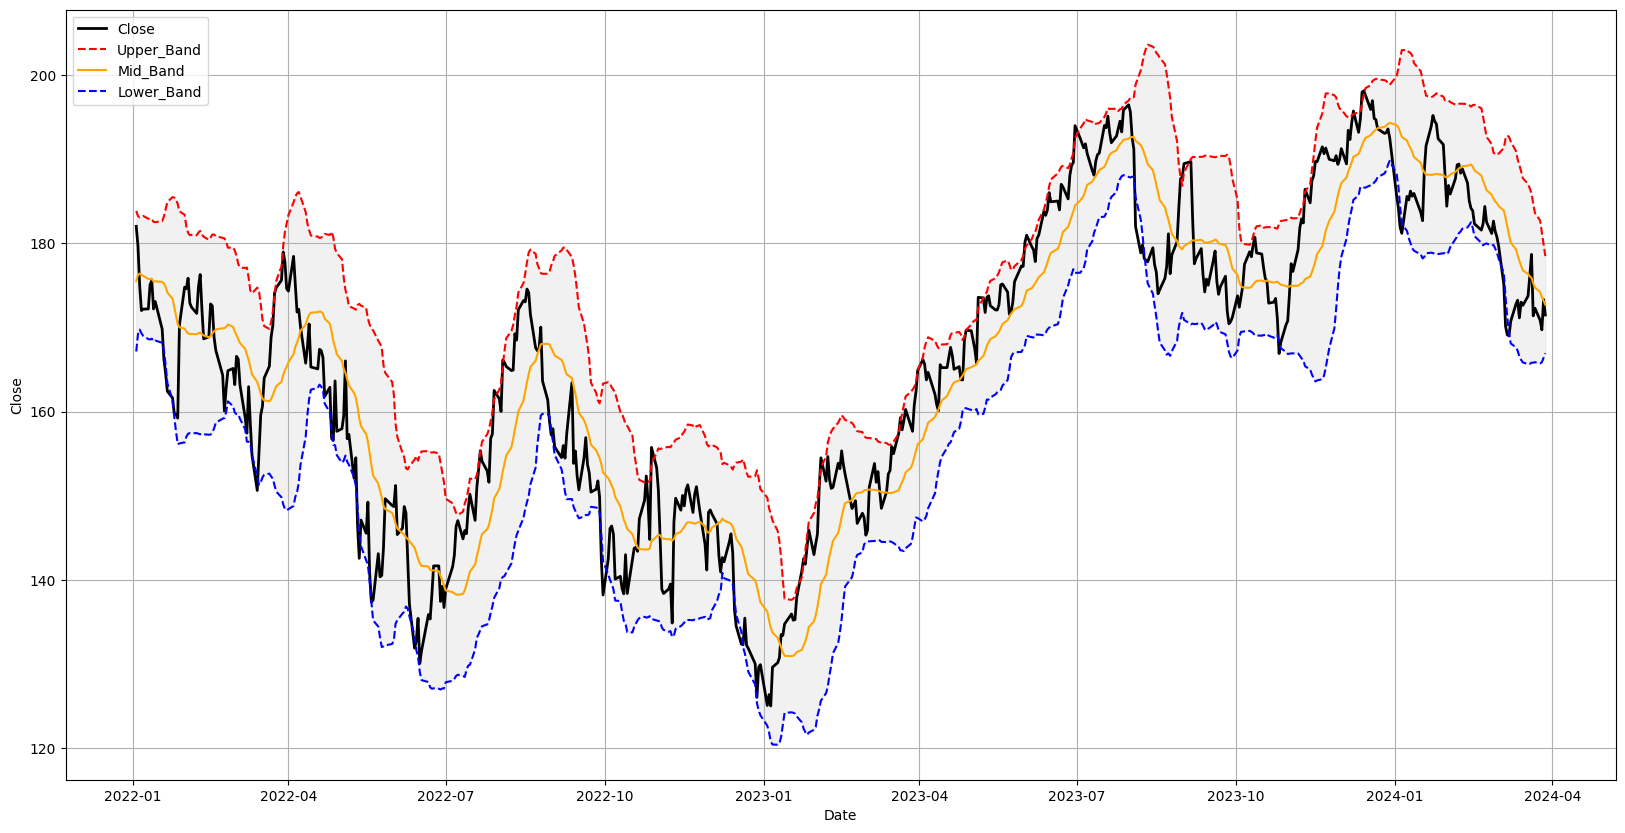

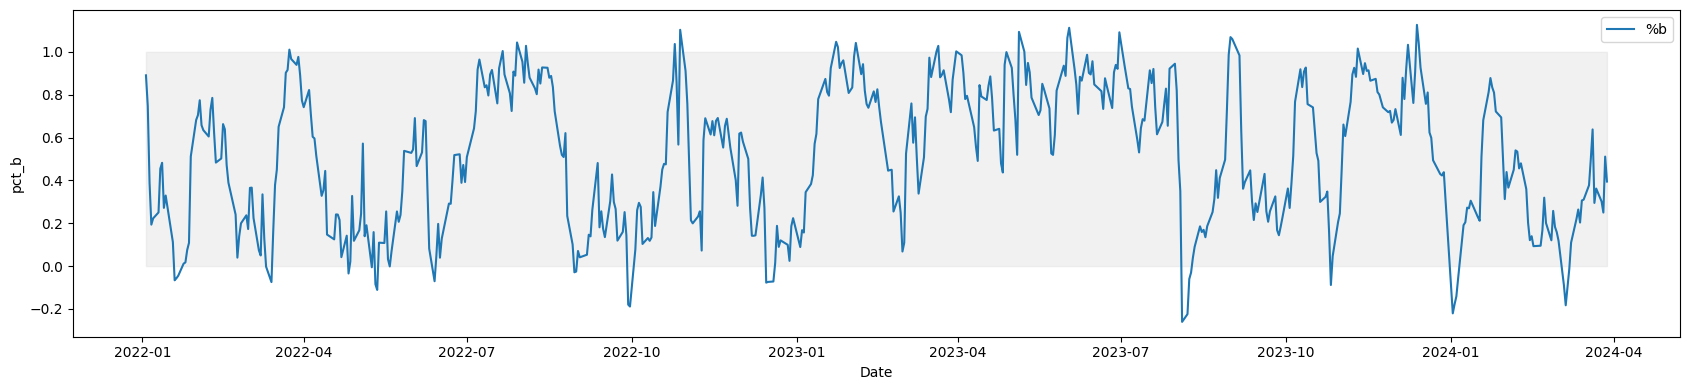

In [17]:
# 2022년 이후, 상단 밴드. 중간 밴드, 하단 밴드, 종가, 밴드 폭 시각화
# 2022년 이후, %b 시각화

sma_2022_df = df.loc[df.index > '2022'].copy()

plt.figure(figsize = (20, 10))

sns.lineplot(data = sma_2022_df, x = sma_2022_df.index, y = 'Close', color = 'black', lw = 2, label = 'Close')
sns.lineplot(data = sma_2022_df, x = sma_2022_df.index, y = 'Upper_Band', color = 'red', linestyle = '--', label = 'Upper_Band')
sns.lineplot(data = sma_2022_df, x = sma_2022_df.index, y = 'SMA_20', color = 'orange', label = 'Mid_Band')
sns.lineplot(data = sma_2022_df, x = sma_2022_df.index, y = 'Lower_Band', color = 'blue', linestyle = '--', label = 'Lower_Band')
plt.fill_between(x = sma_2022_df.index, y1 = sma_2022_df['Upper_Band'], y2 = sma_2022_df['Lower_Band'], color = 'lightgray', alpha = 0.3)
plt.legend()
plt.grid()
plt.show()



plt.figure(figsize = (17, 4))

sns.lineplot(data = sma_2022_df, x = sma_2022_df.index, y = 'pct_b', label = '%b')
plt.fill_between(x = sma_2022_df.index, y1 = 1.0, y2 = 0.0, color = 'lightgray', alpha = 0.3)

plt.tight_layout()
plt.show()

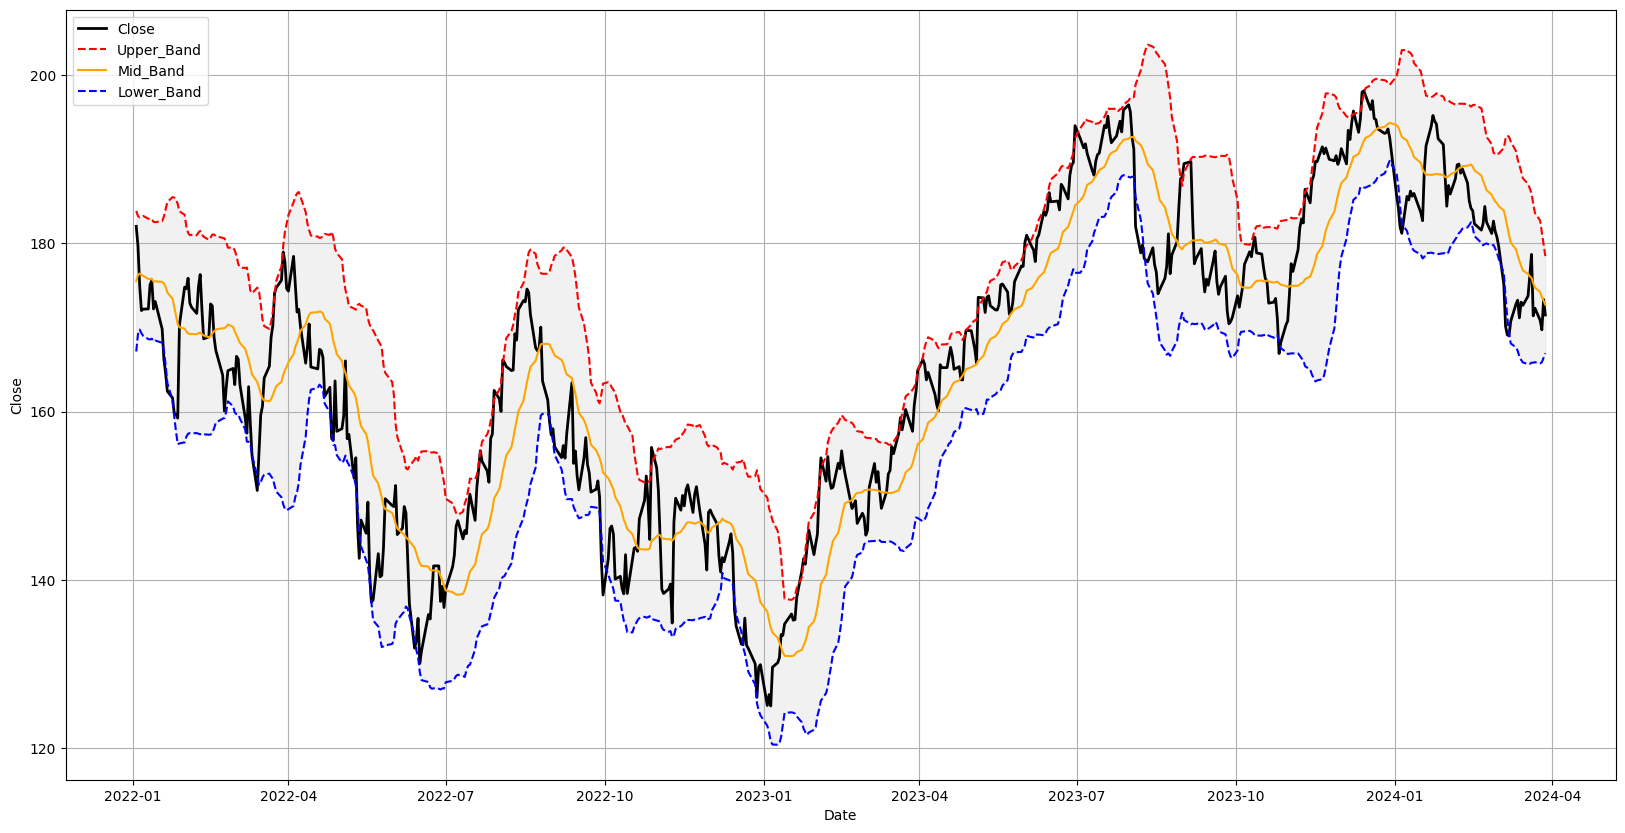

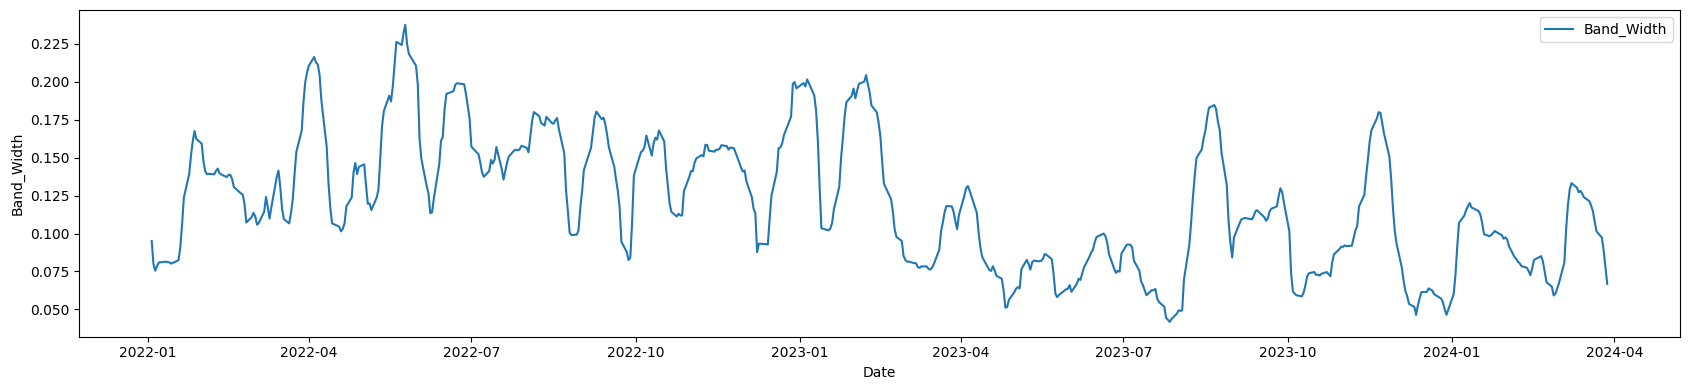

In [18]:
# 2022년 이후, 상단 밴드. 중간 밴드, 하단 밴드, 종가, 밴드 폭 시각화
# 2022년 이후, 밴드 폭 시각화

sma_2022_df = df.loc[df.index > '2022'].copy()

plt.figure(figsize = (20, 10))

sns.lineplot(data = sma_2022_df, x = sma_2022_df.index, y = 'Close', color = 'black', lw = 2, label = 'Close')
sns.lineplot(data = sma_2022_df, x = sma_2022_df.index, y = 'Upper_Band', color = 'red', linestyle = '--', label = 'Upper_Band')
sns.lineplot(data = sma_2022_df, x = sma_2022_df.index, y = 'SMA_20', color = 'orange', label = 'Mid_Band')
sns.lineplot(data = sma_2022_df, x = sma_2022_df.index, y = 'Lower_Band', color = 'blue', linestyle = '--', label = 'Lower_Band')
plt.fill_between(x = sma_2022_df.index, y1 = sma_2022_df['Upper_Band'], y2 = sma_2022_df['Lower_Band'], color = 'lightgray', alpha = 0.3)
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize = (17, 4))

sns.lineplot(data = sma_2022_df, x = sma_2022_df.index, y = 'Band_Width', label = 'Band_Width')
plt.tight_layout()
plt.show()

### 2. 자금 흐름 지표(Money Flow Index, MFI)

---

MFI 참고 자료 : https://skyeong.net/282

* Typical Price(대표 주가) = (High + Low + Close) / 3
> 대표 주가는 최고가, 최저가, 종가의 평균값

* Money Flow(자금 흐름) = Typical Price(대표 주가) * Volume(거래량)
> * MF = 대표주가 * 거래량
 * MF를 통하여 주어진 기간 내에 양의 자금 흐름과 음의 자금 흐름 확인 가능
 * 현재 대표 주가가 전날 대표 주가보다 낮은 날은 MF(자금 흐름)을 음의 자금 흐름(Negative MF)에 추가
 * 현재 대표 주가가 전날 대표 주가보다 동일하거나 크다면, MF(자금 흐름)을 양의 자금 흐름(Positive MF)에 추가

* Money Flow Index(MFI, 자금 흐름 지표)
> * MFI = 100 - (100 / (1 + Positive MF / Negative MF))
 * %b > 0.8 and MFI > 80 : Long(매도 신호)
 * %b < 0.2 and MFI < 20 : Short(매수 신호)


In [19]:
# Typical Price, PMF NMF 컬럼 생성
df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3
df['PMF'] = 0
df['NMF'] = 0

In [20]:
"""
i+1 : 현재
i : 전일

if i+1의 TP >= i의 TP:
    PMF = i+1의 TP * i+1의 Volume
    NMF = 0
elif i+1의 TP < i의 TP:
    PMF = 0
    NMF = i+1의 TP * i+1의 Volume

만약 현재(i+1)의 대표주가(i+1, TP)가 전날(i) 대표주가(i, TP)보다 크다면, PMF에 현재(i+1)의 대표주가(i+1, TP) * 거래량(Volume)
만약 현재(i+1)의 대표주가(i+1, TP)가 전날(i) 대표주가(i, TP)보다 작다면, NMF에 현재(i+1)의 대표주가(i+1, TP) * 거래량(Volume)
"""

for i in range(len(df) - 1):
    if df['TP'].values[i] <= df['TP'].values[i + 1]:
        df['PMF'].values[i + 1] = df['TP'].values[i + 1] * df['Volume'].values[i + 1]
        df['NMF'].values[i + 1] = 0

    elif df['TP'].values[i] > df['TP'].values[i + 1]:
        df['PMF'].values[i + 1] = 0
        df['NMF'].values[i + 1] = df['TP'].values[i + 1] * df['Volume'].values[i + 1]

In [21]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  126.830055   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.398178   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.076103   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.309952   
2021-01-08  132.429993  132.630005  130.229996  132.050003  129.417450   
...                ...         ...         ...         ...         ...   
2024-03-22  171.759995  173.050003  170.059998  172.279999  172.046646   
2024-03-25  170.570007  171.940002  169.449997  170.850006  170.618591   
2024-03-26  170.000000  171.419998  169.580002  169.710007  169.480133   
2024-03-27  170.410004  173.600006  170.110001  173.309998  173.075241   
2024-03-28  171.750000  172.229996  170.509995  171.479996  171.247726   

               Volume       SMA_5    SMA_20      SMA_60     SMA_120  \
Date                                                                  
2021-01-04  143301900         NaN       NaN         NaN         NaN   
2021-01-05   97664900         NaN       NaN         NaN         NaN   
2021-01-06  155088000         NaN       NaN         NaN         NaN   
2021-01-07  109578200         NaN       NaN         NaN         NaN   
2021-01-08  105158200  129.998000       NaN         NaN         NaN   
...               ...         ...       ...         ...         ...   
2024-03-22   71106600  174.423999  174.7270  183.092666  183.655417   
2024-03-25   54288300  173.850000  174.2115  182.720999  183.631250   
2024-03-26   57388400  172.576001  173.5655  182.323166  183.608834   
2024-03-27   60273300  171.504001  173.1600  182.002833  183.605917   
2024-03-28   65672700  171.526001  172.6965  181.766833  183.577333   

            SMA_20_std  Upper_Band  Lower_Band     pct_b  Band_Width  \
Date                                                                   
2021-01-04         NaN         NaN         NaN       NaN         NaN   
2021-01-05         NaN         NaN         NaN       NaN         NaN   
2021-01-06         NaN         NaN         NaN       NaN         NaN   
2021-01-07         NaN         NaN         NaN       NaN         NaN   
2021-01-08         NaN         NaN         NaN       NaN         NaN   
...                ...         ...         ...       ...         ...   
2024-03-22    4.430659  183.588319  165.865681  0.361928    0.101430   
2024-03-25    4.238401  182.688302  165.734697  0.301724    0.097316   
2024-03-26    3.855022  181.275545  165.855455  0.249969    0.088843   
2024-03-27    3.382978  179.925956  166.394044  0.511085    0.078147   
2024-03-28    2.887030  178.470561  166.922439  0.394658    0.066869   

                    TP          PMF          NMF  
Date                                              
2021-01-04  129.926669            0            0  
2021-01-05  130.393331  12734851632            0  
2021-01-06  128.009999            0  19852814776  
2021-01-07  130.136668  14260141833            0  
2021-01-08  131.636668  13842675060            0  
...                ...          ...          ...  
2024-03-22  171.796667            0  12215876857  
2024-03-25  170.746668            0   9269546354  
2024-03-26  170.236669            0   9769610055  
2024-03-27  172.340002  10387500622            0  
2024-03-28  171.406662            0  11256738313  

[814 rows x 18 columns]

In [22]:
# MFI 컬럼 생성

df['MFI'] = 100 - 100 / (1 + df['PMF'].rolling(window = 14).sum() / df['NMF'].rolling(window = 14).sum())
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  126.830055   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.398178   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.076103   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.309952   
2021-01-08  132.429993  132.630005  130.229996  132.050003  129.417450   
...                ...         ...         ...         ...         ...   
2024-03-22  171.759995  173.050003  170.059998  172.279999  172.046646   
2024-03-25  170.570007  171.940002  169.449997  170.850006  170.618591   
2024-03-26  170.000000  171.419998  169.580002  169.710007  169.480133   
2024-03-27  170.410004  173.600006  170.110001  173.309998  173.075241   
2024-03-28  171.750000  172.229996  170.509995  171.479996  171.247726   

               Volume       SMA_5    SMA_20      SMA_60     SMA_120  \
Date                                                                  
2021-01-04  143301900         NaN       NaN         NaN         NaN   
2021-01-05   97664900         NaN       NaN         NaN         NaN   
2021-01-06  155088000         NaN       NaN         NaN         NaN   
2021-01-07  109578200         NaN       NaN         NaN         NaN   
2021-01-08  105158200  129.998000       NaN         NaN         NaN   
...               ...         ...       ...         ...         ...   
2024-03-22   71106600  174.423999  174.7270  183.092666  183.655417   
2024-03-25   54288300  173.850000  174.2115  182.720999  183.631250   
2024-03-26   57388400  172.576001  173.5655  182.323166  183.608834   
2024-03-27   60273300  171.504001  173.1600  182.002833  183.605917   
2024-03-28   65672700  171.526001  172.6965  181.766833  183.577333   

            SMA_20_std  Upper_Band  Lower_Band     pct_b  Band_Width  \
Date                                                                   
2021-01-04         NaN         NaN         NaN       NaN         NaN   
2021-01-05         NaN         NaN         NaN       NaN         NaN   
2021-01-06         NaN         NaN         NaN       NaN         NaN   
2021-01-07         NaN         NaN         NaN       NaN         NaN   
2021-01-08         NaN         NaN         NaN       NaN         NaN   
...                ...         ...         ...       ...         ...   
2024-03-22    4.430659  183.588319  165.865681  0.361928    0.101430   
2024-03-25    4.238401  182.688302  165.734697  0.301724    0.097316   
2024-03-26    3.855022  181.275545  165.855455  0.249969    0.088843   
2024-03-27    3.382978  179.925956  166.394044  0.511085    0.078147   
2024-03-28    2.887030  178.470561  166.922439  0.394658    0.066869   

                    TP          PMF          NMF        MFI  
Date                                                         
2021-01-04  129.926669            0            0        NaN  
2021-01-05  130.393331  12734851632            0        NaN  
2021-01-06  128.009999            0  19852814776        NaN  
2021-01-07  130.136668  14260141833            0        NaN  
2021-01-08  131.636668  13842675060            0        NaN  
...                ...          ...          ...        ...  
2024-03-22  171.796667            0  12215876857  38.165293  
2024-03-25  170.746668            0   9269546354  39.706194  
2024-03-26  170.236669            0   9769610055  40.141288  
2024-03-27  172.340002  10387500622            0  46.718526  
2024-03-28  171.406662            0  11256738313  39.412279  

[814 rows x 19 columns]

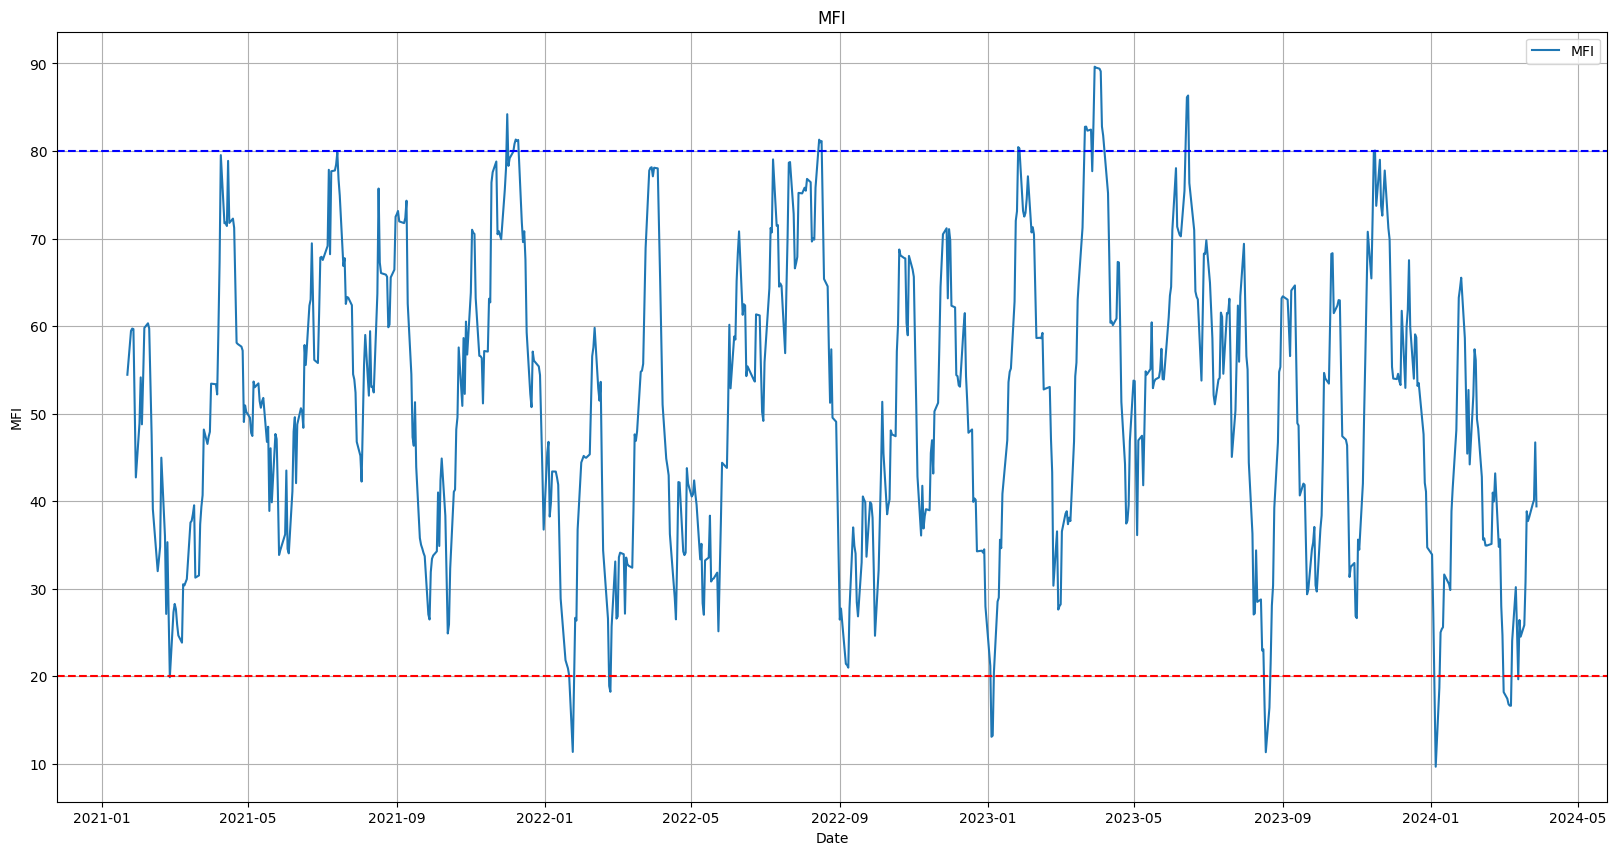

In [23]:
# 자금 흐름 지수(MFI) 시각화

plt.figure(figsize = (20, 10))

sns.lineplot(data = df, x = df.index, y = df['MFI'], label = 'MFI')
plt.axhline(80, linestyle = '--', color = 'blue')
plt.axhline(20, linestyle = '--', color = 'red')

plt.title('MFI')
plt.legend()
plt.grid()
plt.show()

In [24]:
# Buy, Sell 컬럼 생성
"""
Buy 컬럼 : 매도 타이밍 MFI > 80
Sell 컬럼 : 매수 타이밍 MFI < 20

MFI 추가 설명

MFI 값이 80 이상일 경우 과잉 매수
MFI 값이 20 이상일 경우 과잉 매도

MFI를 이용하는 방법 괴리도(Divergence)

괴리도 란. 오실레이터(두 극단 사이를 이동하는 선 그래프)가 가격의 반대 방향으로 움직일 때, 역전 신호라고 해석

ex)
MFI값이 높았던 상황에, 80이하로 떨어지기 시작하고 주가가 계속 올라가고 있는 상황은 하락세 신호
주가가 하락중인 상황에, MFI값이 20을 넘기는 경우 하락세가 끝나고 상승세 신호
"""

# 1. MFI 80이상이면 Sell에 Close 입력, MFI 20 이하이면 Buy에 Close 입력, 나머지는 np.NaN으로 초기화하는 함수 생성

def signal(data, high = 80, low = 20):
    buy = []
    sell = []
    for i in range(len(data['MFI'])):
        if data['MFI'][i] > high: # 매도 타이밍
            buy.append(np.NaN)
            sell.append(data['Close'][i])
        elif data['MFI'][i] < low:  # 매수 타이밍
            buy.append(data['Close'][i])
            sell.append(np.NaN)
        else:
            buy.append(np.NaN)
            sell.append(np.NaN)

    return buy, sell

# 2. df에 Buy, Sell 컬럼 추가

df['Buy'], df['Sell'] = signal(df)

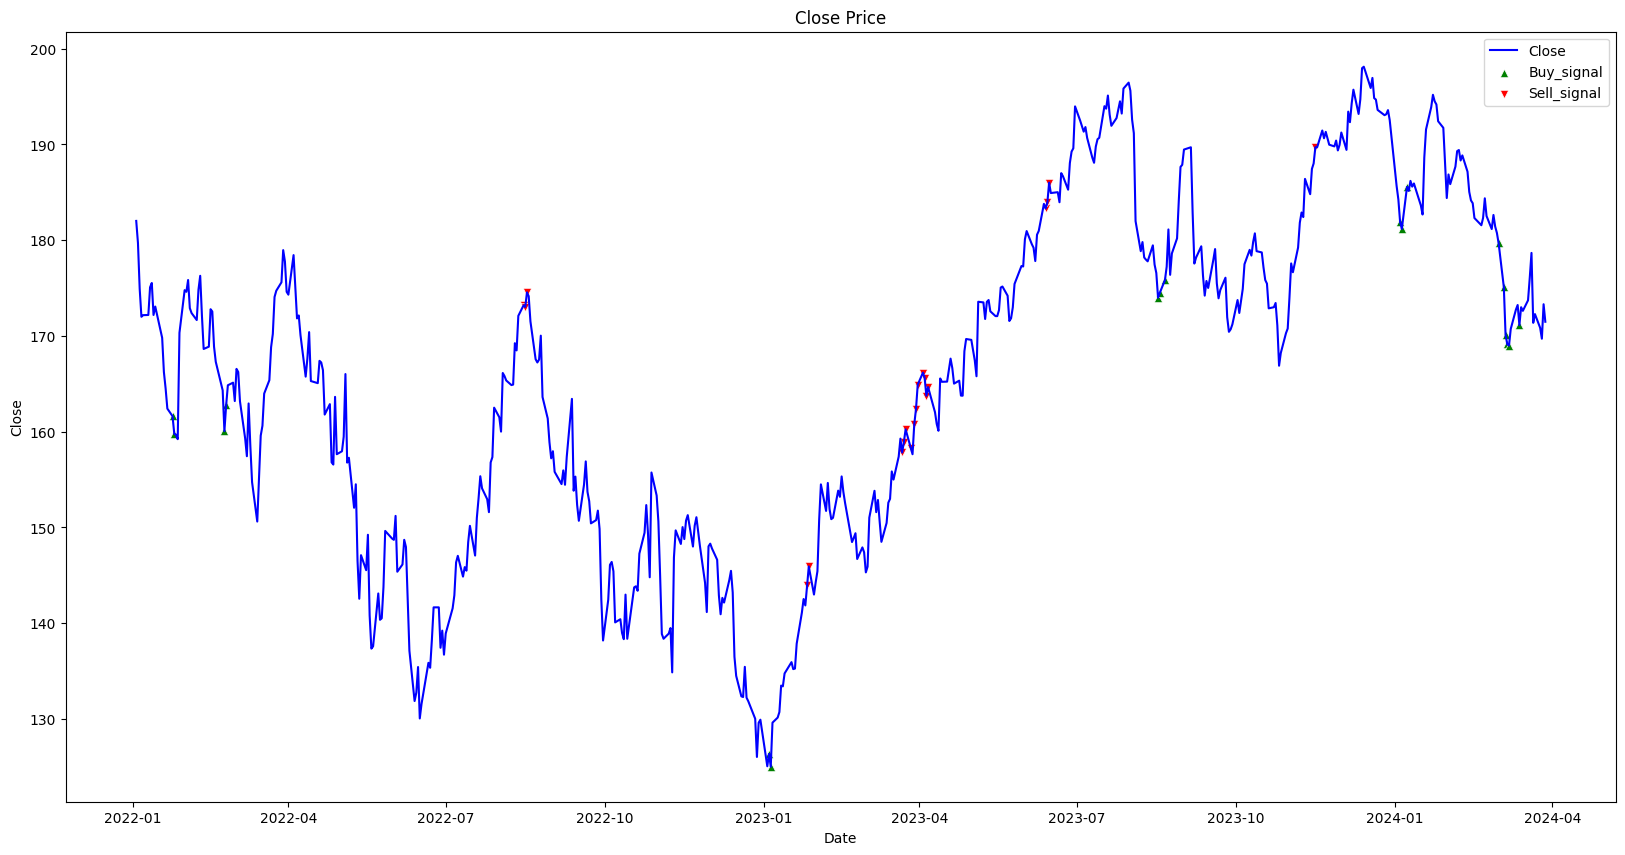

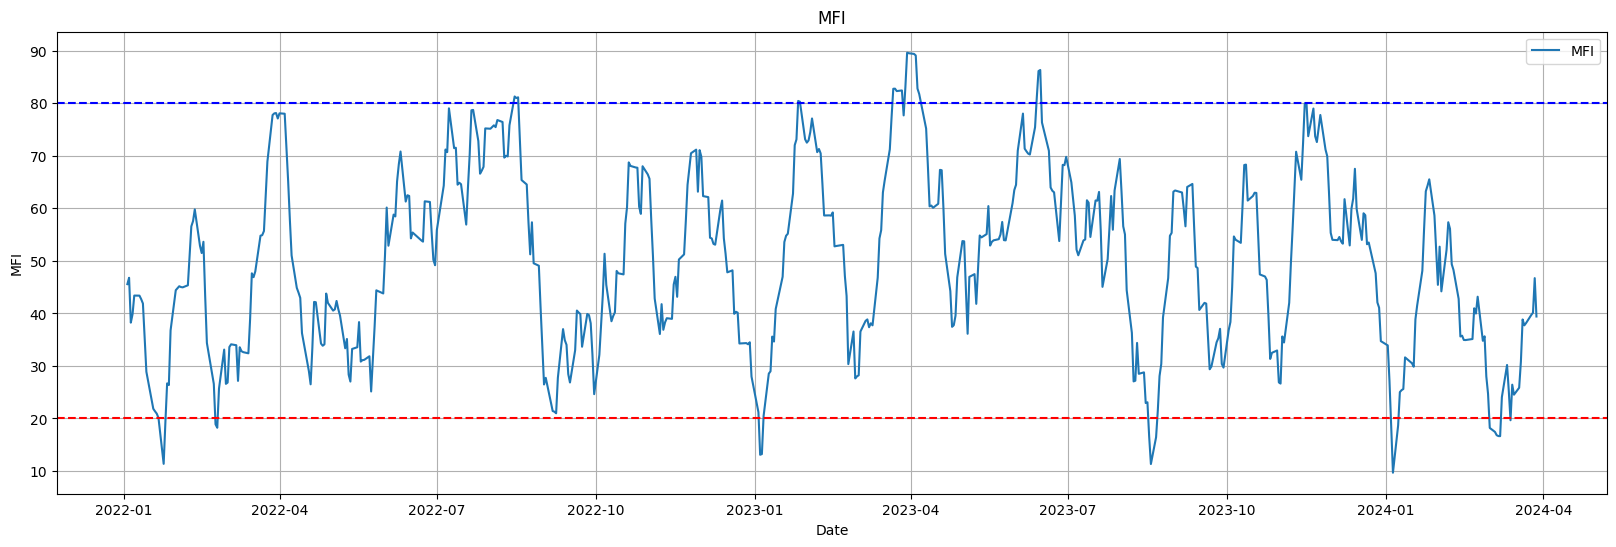

In [25]:
# 2022년 이후, 매수/매도 타이밍 모두 시각화

df_2022 = df.loc[df.index > '2022'].copy()

plt.figure(figsize = (20, 10))

sns.lineplot(data = df_2022, x = df_2022.index, y = 'Close', color = 'blue', label = 'Close')
sns.scatterplot(data = df_2022, x = df_2022.index, y = 'Buy', color = 'green', label = 'Buy_signal', marker = '^')
sns.scatterplot(data = df_2022, x = df_2022.index, y = 'Sell', color = 'red', label = 'Sell_signal', marker = 'v')
plt.title('Close Price')
plt.legend()
plt.show()

plt.figure(figsize = (20, 6))
sns.lineplot(data = df_2022, x = df_2022.index, y = df_2022['MFI'], label = 'MFI')
plt.axhline(80, linestyle = '--', color = 'blue')
plt.axhline(20, linestyle = '--', color = 'red')
plt.title('MFI')
plt.legend()
plt.grid()
plt.show()

### MACD(Moving Average Covergence & Divergence) : 이동평균선의 수렴과 확산


---

MACD에서 보편적으로 사용되는 이동평균은 **지수 이동 평균(Exponential Moving Average, EMA)**    

---


**EMA**
> * 최신 데이터에 더 많은 가중치를 적용하여 계산하는 이동 평균
* 값.ewm(span = period).mean()
* ewm 파라미터 : https://wikidocs.net/152787

**MACD(Moving Average Covergence & Divergence)** = 단기 이동평균선 - 장기 이동평균선

> * Moving Average : 이동평균선
* Covergence : 수렴(가까워짐)
* Divergence : 확산(멀어짐)
* 보편적인 사용, 단기 이평선(12일 이동평균선), 장기 이평선(26일 이동평균선),
    * MACD곡선이 + 인경우 : 상승추세를 의미 == 단기(12일) 이평선 > 장기(26일) 이평선 == 장기적 주가보다 단기적 주가가 높음
    * MACD 곡선이 - 인경우 : 하락추세를 의미 === 단기(12일) 이평선 < 장기(26일) 이평선 == 장기적 주가보다 단기적 주가가 낮음
* 시그널 선 : MACD 9일 이동평균선
    * 시그널 선을 통해 확인 가능 한 것 : 매수 신호(골든 크로스) / 매도 신호(데드 크로스)
    * MACD가 시그널 선을 밑에서 위로 올라가는 지점 : 매수 신호를 의미(골든 크로스)
    * MACD가 시그널 선을 위에서 아래로 내려가는 지점 : 매도 신호를 의미(데드 크로스)
* MACD Oscillator : MACD와 시그널 선 간의 차이(주로 막대 그래프로 표현)

In [26]:
# MACD_Short, MACD_Long, MACD_signal, MACD, MACD_Sign(매수, 매도), MACD_Oscillator 컬럼 생성

df['MACD_Short'] = df['Close'].ewm(span = 12).mean()
df['MACD_Long'] = df['Close'].ewm(span = 26).mean()
df['MACD'] = df['MACD_Short'] - df['MACD_Long']
df['MACD_Signal'] = df['MACD'].ewm(span = 9).mean()
df['MACD_Sign'] = df.apply(lambda x : ("매수" if x['MACD'] > x['MACD'] else "매도"), axis = 1)
df['MACD_Oscillator'] = df['MACD'] - df['MACD_Signal']

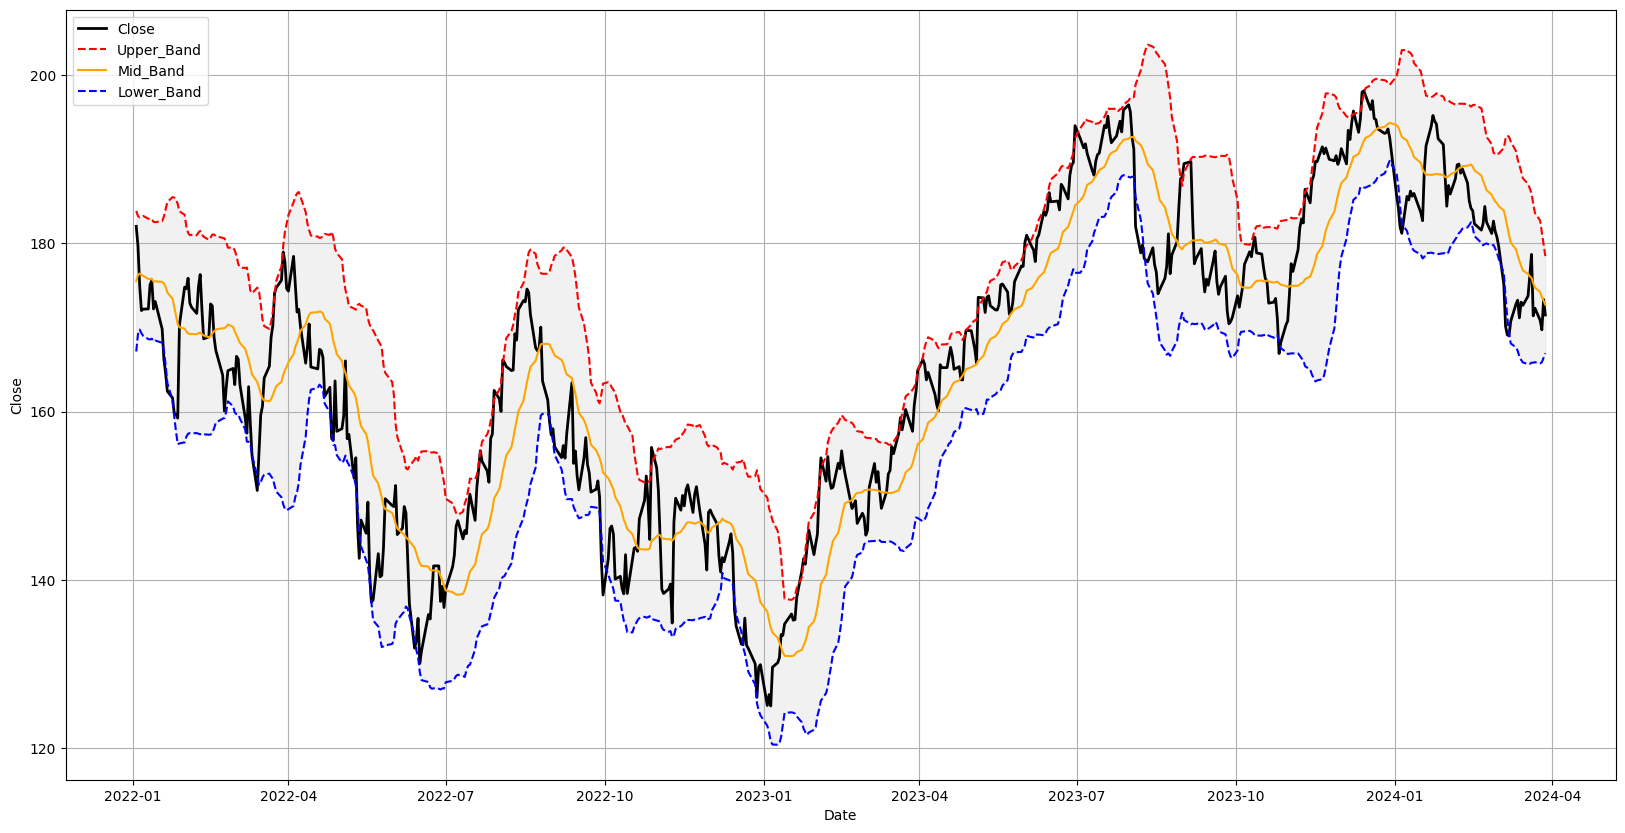

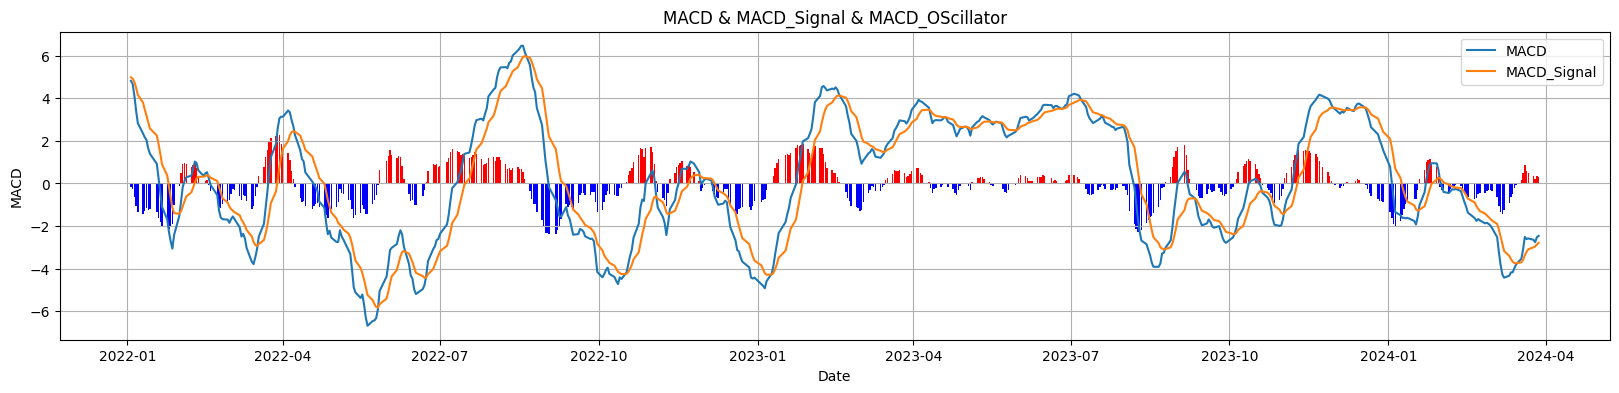

In [27]:
# 2022년 이후, 상단 밴드. 중간 밴드, 하단 밴드, 종가, 밴드 폭 시각화

df_2022 = df.loc[df.index > '2022'].copy()

plt.figure(figsize = (20, 10))

sns.lineplot(data = df_2022, x = df_2022.index, y = 'Close', color = 'black', lw = 2, label = 'Close')
sns.lineplot(data = df_2022, x = df_2022.index, y = 'Upper_Band', color = 'red', linestyle = '--', label = 'Upper_Band')
sns.lineplot(data = df_2022, x = df_2022.index, y = 'SMA_20', color = 'orange', label = 'Mid_Band')
sns.lineplot(data = df_2022, x = df_2022.index, y = 'Lower_Band', color = 'blue', linestyle = '--', label = 'Lower_Band')
plt.fill_between(x = df_2022.index, y1 = df_2022['Upper_Band'], y2 = df_2022['Lower_Band'], color = 'lightgray', alpha = 0.3)
plt.legend()
plt.grid()
plt.show()

# 2022년 이후, MACD, MACD_Signal, MACD_Oscillator 시각화

plt.figure(figsize = (20, 4))
sns.lineplot(data = df_2022, x = df_2022.index, y = df_2022['MACD'], label = 'MACD')
sns.lineplot(data = df_2022, x = df_2022.index, y = df_2022['MACD_Signal'], label = 'MACD_Signal')
plt.bar(data = df_2022[df_2022['MACD_Oscillator'] >= 0], x = df_2022[df_2022['MACD_Oscillator'] >= 0].index, height = df_2022[df_2022['MACD_Oscillator'] >= 0]['MACD_Oscillator'], color = ['red'])
plt.bar(data = df_2022[df_2022['MACD_Oscillator'] < 0], x = df_2022[df_2022['MACD_Oscillator'] < 0].index, height = df_2022[df_2022['MACD_Oscillator'] < 0]['MACD_Oscillator'], color = ['blue'])

plt.title('MACD & MACD_Signal & MACD_OScillator')
plt.legend()
plt.grid()
plt.show()

### MDD(Maximum Draw Down) : 특정 투자 기간 동안의 낙폭들 중 최대 낙폭값을 고점 값으로 나눈 비율로 최대 손실율
> MDD = (최저점 - 최고점) / 최저점

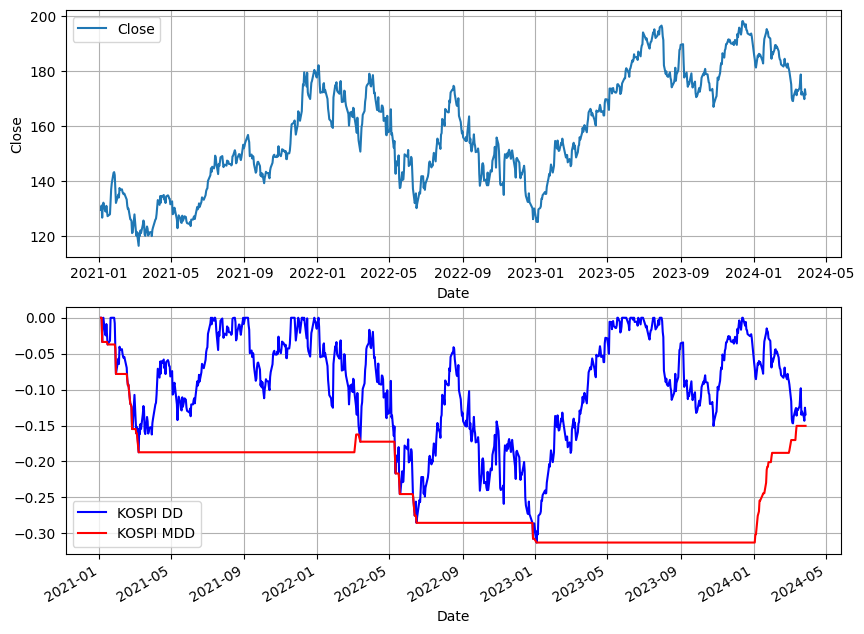

In [28]:
# MDD
# 1년간 영업일은 252일로 잡아서 window = 252로 설정
window = 252

# 2. kospi 종가에서 1년기간 단위 최고치 peak를 구함
peak = df['Close'].rolling(window, min_periods=1).max()

# 3. kospi 최고치 대비 현재 kospi 종가가 얼마나 하락했는지 구함
drawdown = df['Close']/peak - 1.0

# 4. drawdown에서 1년기간 단위로 최저치 max_dd를 구한다.
# max_dd는 마이너스 값이기에 최저치가 MDD가 된다.
max_dd = drawdown.rolling(window, min_periods=1).min()


# 그래프 작성
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
sns.lineplot(data = df, x = df.index, y = 'Close', label='Close')
plt.grid()
plt.subplot(2, 1, 2)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

# 시계열 데이터 분석

---

**keywords**
> * Trend component(추세 성분) :
    * 관측 값의 전반적 상승 또는 하락 경향을 나타내는 성분
* Seasonal component(계절 성분) :
    * 1년 단위 혹은, 짧은 주기, 계절에 따라 영향을 받는 차이
    * 주기적인 패턴이 반복적으로 나타나는 주기
    * ex) 월별, 계절별, 5일 혹은 7일(요일별)...
* Irregular component(불규칙 성분) :
    * 패턴과 관계없이 나타나는 값
    * ex) 이벤트, 공휴일, 거래정지 기간(주식), 액면분할 과정 속 정지(주식), 가게 마다 다른 영업휴일(수요관련)
* Cyclical component(순환 성분) :
    * 장기간 추세선을 따라 주기적으로 오르고 내리는 반복 현상


---


**중요** Q1. 순환 성분이랑, 계절 성분은 같은 것인가? 다르다면 차이점은?
> A1.
* 계절 성분으로는 설명 되지 않는 장기적인 변동 = 순환 성분
* 순환 성분은 추세선에 영향을 받음

## 시계열 정상성 & 비정상성

---

**정상성(Stationarity)** : 시점에 따라 평균이나 분산 같은 **통계적 특징이 변하지 않고, 추세나 계절성이 없는 시계열 데이터**

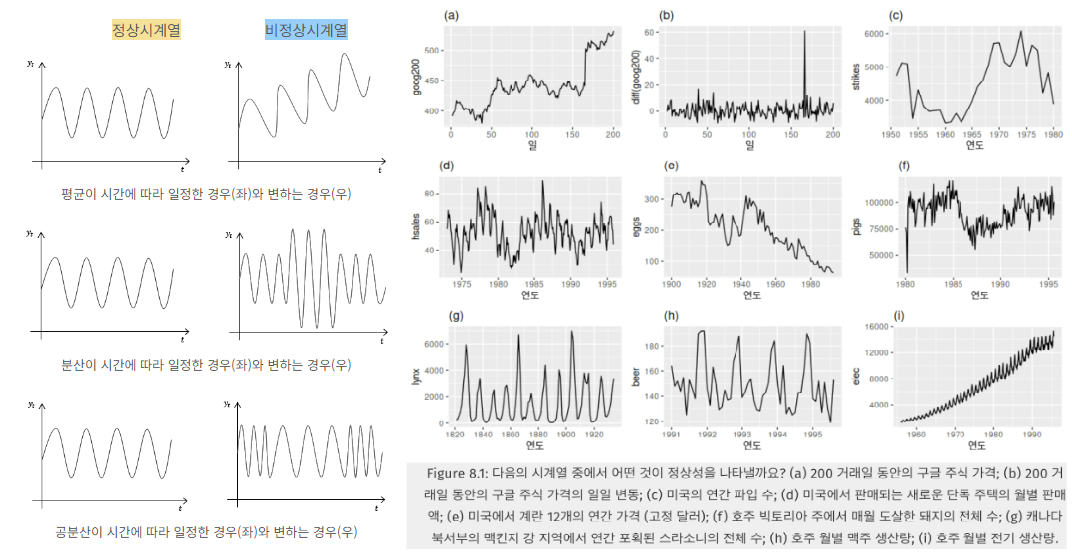


In [29]:
# 문제 오른쪽 9개의 시계열 데이터에서 정상성을 띄는 시계열 데이터는 어떤 것이 있는가?
# 답 : (b), (g)

"""
해설 :
(d),(h)는 계절성이 보이기 때문에 정상성을 띠지 않습니다.
(a),(c),(e),(f)는 어떤 특정한 트렌드 (추세)가 있기 때문에 정상성을 띠지 않습니다.
(i)는 계절성도, 트렌드도 보이며 심지어 분산도 시간에 따라 커지는 형태이므로 정상성을 띠지 않습니다.

"""

'\n해설 :\n(d),(h)는 계절성이 보이기 때문에 정상성을 띠지 않습니다.\n(a),(c),(e),(f)는 어떤 특정한 트렌드 (추세)가 있기 때문에 정상성을 띠지 않습니다.\n(i)는 계절성도, 트렌드도 보이며 심지어 분산도 시간에 따라 커지는 형태이므로 정상성을 띠지 않습니다.\n\n'

## 정상성 판단, 정상성으로 변환

**정상성 판단 방법**
> * 시각화를 통한 직관적인 해석
* Auto Correlation Function(ACF, 자기 상관 함수) : 현재 시점의 자료와 시점의 차이(Lag)를 가진 자료의 상관성을 나타내는 측도
* Partial Autocorrelation Function(PACF, 편자기상관함수 또는 부분자기상관함수) : 두 시점 내 구간 값을 고려하지 않고, **두 시점의 상관관계를 확인** 하는 것


---


**정상성으로 데이터 변환**
> * 차분(diff)
* 로그 변환(log scale)
* 로그 차분(log diff)

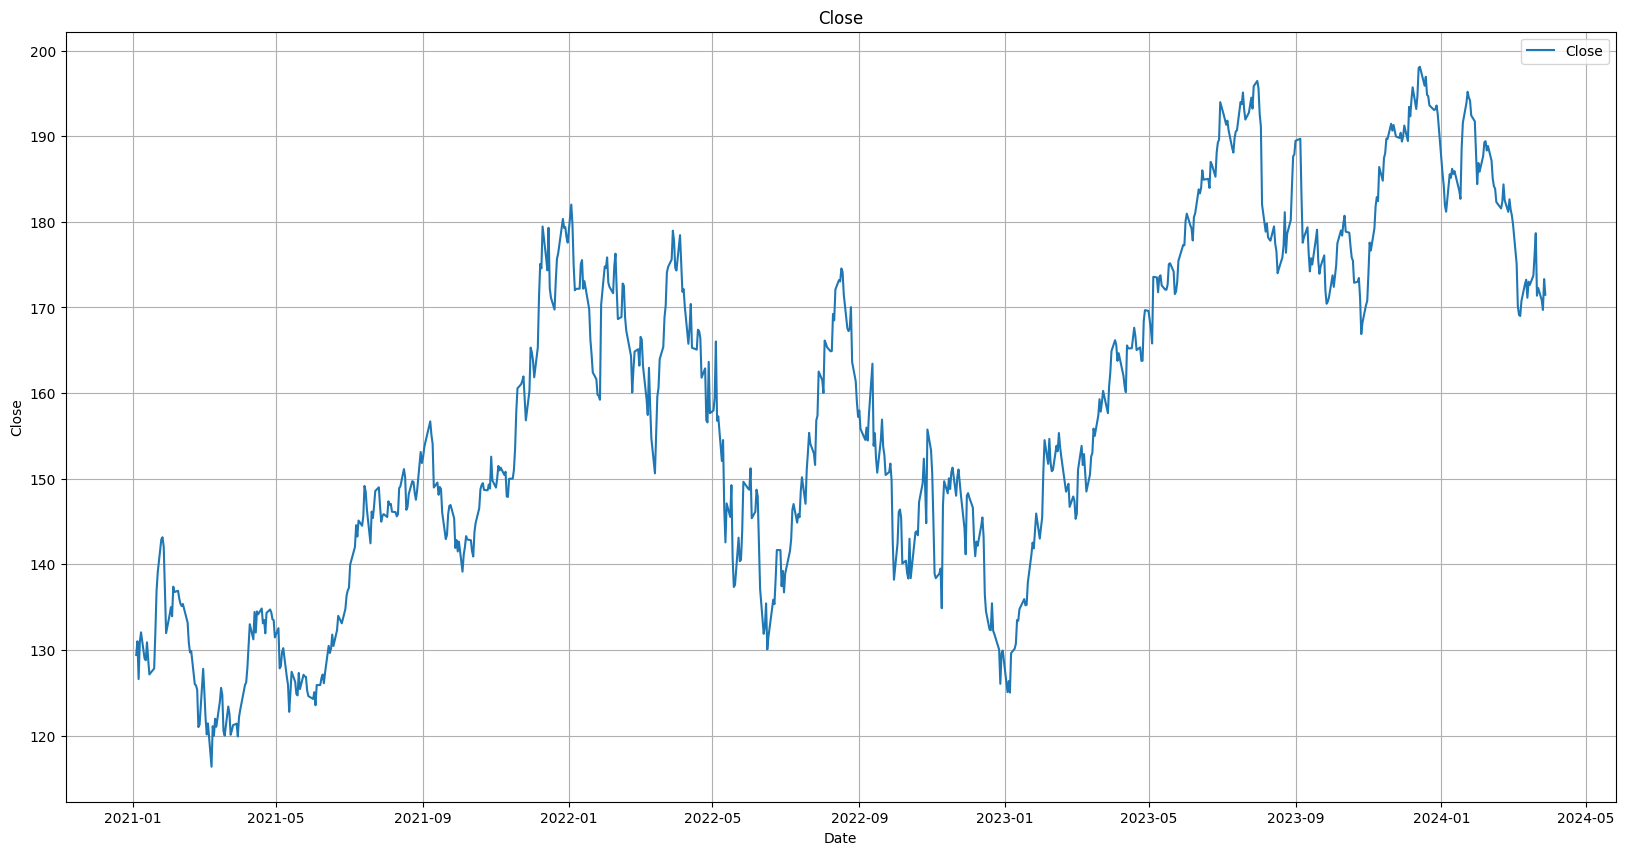

In [30]:
# 종가 데이터를 통해 확인 해보기

# 1. 직관적인 해석
"""
Q2. 시각화를 통해 종가에 대한 데이터를 확인해 보았을 때, 위 데이터는 정상 시계열 인가? 비정상 시계열인가?
A2. 비정상 시계열 데이터
"""

plt.figure(figsize = (20, 10))
sns.lineplot(data = df, x = df.index, y = 'Close', label = 'Close')

plt.title('Close')
plt.grid()
plt.show()

In [31]:
# auto_arima 라이브러리 설치
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:00


In [32]:
# 이후에 사용할 라이브러리 선언

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

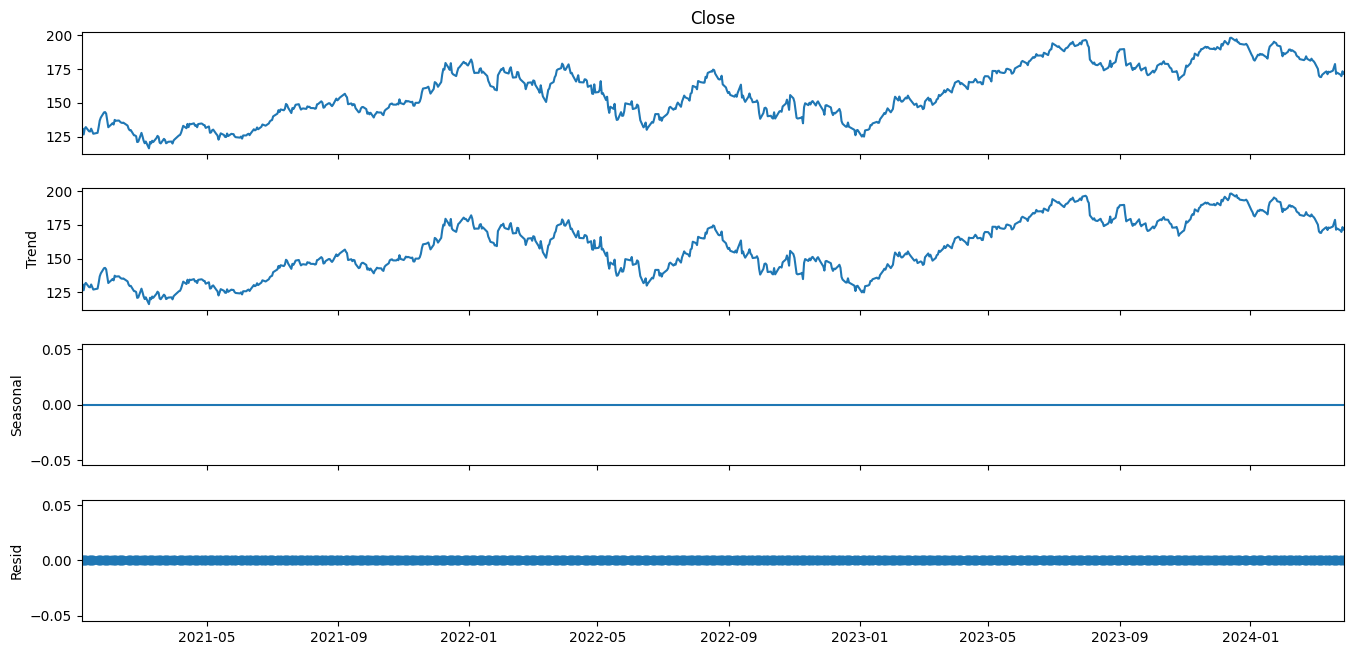

In [33]:
# 종가 데이터를 통해 확인 해보기

# 시계열 데이터 분해

# 1. 원본 데이터
# 2. Trend Component
# 3. Seasonal Component
# 4. residual Component

decomposition = sm.tsa.seasonal_decompose(df['Close'], model = 'additive', period = 1)

plot_decomposition = decomposition.plot()
plot_decomposition.set_size_inches(15, 7)
plt.show()

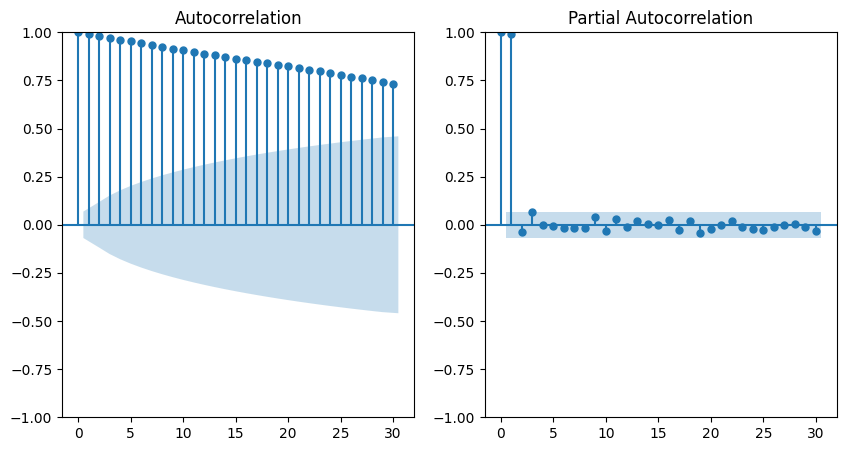

In [34]:
# 종가 데이터를 통해 확인 해보기

"""
ACF 해석 : MA(x) 지정
x 축 : 시점을 나타냄
y 축 : 자기 상관 계수를 나타냄
파란색 영역 : 신뢰 구간

* 따라서, x 가 0일 때, 자기 상관 계수가 1인 것을 확인.
* 정상 시계열 데이터라면, 영역에 표시 y 값이 신뢰구간에 위치 할 것이다.
* 이는 비정상 시계열 임을 알 수 있다.

비정상 시계열의 해석 :
시점이 늘어남에 따라, 자기 상관 계수가 점차 줄어든다.
=> 전일 데이터가 당일 데이터르를 가장 잘 설명하고, 멀어질 수록 관계가 상관성이 떨어진다.

--------------------------------------------------------------------------------------------

PACF 해석 : AR(x)지정

1시점 이후 값이 절단점(y == 0)에 가까이 위치하므로, 1차 차분 필요
또는 3시점에 유의수준을 벗어난 이후, 다시 0과 가까워 졌으므로, 3차 차분 가능성 생각
"""

# ACF, PACF 시각화

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

plot_acf(df['Close'][1:].values, lags = 30, ax = ax[0])
plot_pacf(df['Close'][1:].values, lags = 30, ax = ax[1])

plt.show()

### 정상성 검증

#### ADF(Augmented Dickey - Fuller Test) : 단위근 검정

**단위근(Unit Root)**
> 오늘의 영향력이 미래에 어느 정도 영향을 미치는지를 결정하는 모수(parameter)
* 현재(t) 값이 미래(t+1, t+2, t+n...)에 관계가 있는지를 결정하는 값
* ex) if -1 < x < 1: 영향력 x, if x > 1: 영향력 o == 현재 시점의 영향력이 미래 시점에 영향을 계속 미칠 수 있다.

---
* 추세에 유리하게 만들어진 검정 방법, 추세가 없으면 정상 시계열
* 회귀 분석 결과로 나온 계수를 검정 통계량으로 사용
* ADF-Test를 통해 시계열 데이터가 정상성을 가지는지 검정하고, 비정상 시계열이면, 정상성으로 변환 하여야 함.

> * 귀무가설 : 단위근이 존재한다 == 현재 값과 미래 값이 관계가 있다 == 해당 시계열은 비정상(non-stationary) 시계열이다.
* 대립가설 : 단위근이 존재하지 않는다 == 현재 값과 미래 값이 관계가 없다 == 해당 시계열은 정상(stationary) 시계열이다.
* **p-value <= 0.05** : 귀무가설 기각 / 대립가설 채택 => **정상 시계열**
* **p-value > 0.05** : 귀무가설 채택 / 대립가설 기각 => **비정상 시계열**

In [35]:
# adfuller()의 리턴 값 확인해보기
from statsmodels.tsa.stattools import adfuller

adfuller(df['Close'])

(-2.0587802097810166,
 0.2614088718492899,
 0,
 813,
 {'1%': -3.4384189633001956,
  '5%': -2.86510158480911,
  '10%': -2.568666500743605},
 3780.9221936430035)

In [36]:
def ADF_Test(values):
    result = adfuller(values)
    print(f"ADF Statistic(검정 통계량) : {result[0]:.4f}")
    print(f"ADF p-value : {result[1]:.4f}")
    for key, value in result[4].items():
        print(f'{key} : {value:.3f}')
    if result[1] <= 0.05:
        print("귀무가설 기각 / 대립가설 채택 -> 정상 시계열")
    else:
        print("귀무가설 채택 / 대립가설 기각 -> 비정상 시계열")

ADF_Test(df['Close'])

ADF Statistic(검정 통계량) : -2.0588
ADF p-value : 0.2614
1% : -3.438
5% : -2.865
10% : -2.569
귀무가설 채택 / 대립가설 기각 -> 비정상 시계열


In [37]:
# ADF 해석

# Q3. p-value를 통하여 정상성 판단해보기
# A3.
# ADF p-value(0.2614) 가 0.05 보다 크므로 비정상성 시계열 데이터 판단

#### KPSS(Kwiatkowski-Phillips-Schmidt-Shin Test)


---
* 계절성에 유리하게 만들어져, 계절성이 없으면 정상 시계열
* 회귀 분석 결과로 나온 계수를 검정 통계량으로 사용
* KPSS를 통해 시계열 데이터가 완벽한 정상성을 가지는지 판단은 못하지만, trend-stationary(귀무가설 채택 / 대립가설 기각) / non-stationary(귀무가설 기각 / 대립가설 채택)로 판단 가능

> * 귀무가설 : 해당 시계열은 정상(trend-stationary) 시계열이다.
* 대립가설 : 해당 시계열은 비정상(non-stationary) 시계열이다.
* **p-value <= 0.05** : 귀무가설 기각 / 대립가설 채택 => **비정상 시계열**
* **p-value > 0.05** : 귀무가설 채택 / 대립가설 기각 => **정상 시계열**

In [38]:
# adfuller()의 리턴 값 확인해보기
from statsmodels.tsa.stattools import kpss

kpss(df['Close'])

<ipython-input-38-f60156bc0d01>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(df['Close'])


(2.4671413650095504,
 0.01,
 18,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [39]:
def KPSS_Test(values):
    result = kpss(values)
    print(f"ADF Statistic(검정 통계량) : {result[0]:.4f}")
    print(f"ADF p-value : {result[1]:.4f}")
    for key, value in result[3].items():
        print(f'{key} : {value:.3f}')
    if result[1] <= 0.05:
        print("귀무가설 기각 / 대립가설 채택 -> 비정상 시계열")
    else:
        print("귀무가설 채택 / 대립가설 기각 -> 정상 시계열")

KPSS_Test(df['Close'])

ADF Statistic(검정 통계량) : 2.4671
ADF p-value : 0.0100
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
귀무가설 기각 / 대립가설 채택 -> 비정상 시계열


<ipython-input-39-b7236fe5ba9b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(values)


In [40]:
# KPSS 해석

# Q4. p-value를 통하여 정상성 판단해보기
# A4.
# KPSS p-value(0.0100) 가 0.05 보다 작으므로 비정상성 시계열 데이터 판단

**ADF**
> * 귀무가설 : 해당 시계열은 비정상(non-stationary) 시계열이다.
* 대립가설 : 해당 시계열은 정상(stationary) 시계열이다.

**KPSS**
> * 귀무가설 : 해당 시계열은 정상(trend-stationary) 시계열이다.
* 대립가설 : 해당 시계열은 비정상(non-stationary) 시계열이다.



---


**두 검정을 통해 얻을 수 있는 결론**


(1) ADF 귀무가설 기각 & KPSS 귀무가설 채택 -> 주어진 시계열은 stationary

(2) ADF 귀무가설 채택 & KPSS 귀무가설 채택 -> 주어진 시계열은 trend-stationary

 (3) ADF 귀무가설 채택 & KPSS 귀무가설 기각 -> 주어진 시계열은 non-stationary

 (4) ADF 귀무가설 기각 & KPSS 귀무가설 기각 -> 해석 불분명

In [41]:
# Q5. 두 검정을 통해 얻은 결론
# A5. ADF 귀무가설 채택 % KPSS 귀무가설 기각 => non-stationary

### 정상성으로 데이터 변환

#### 차수 변환


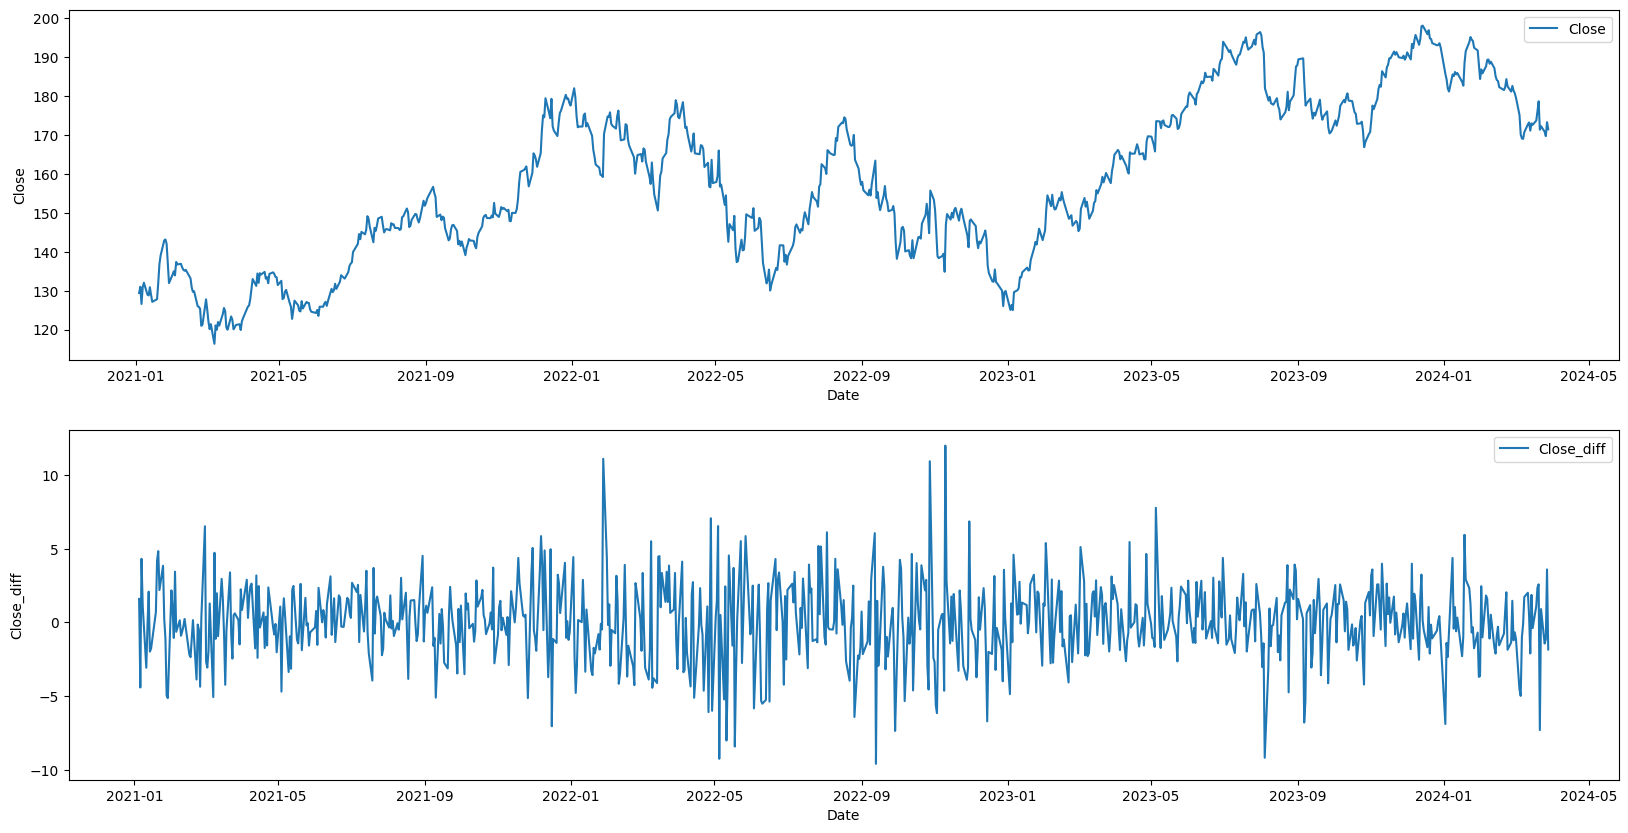

In [42]:
df['Close_diff'] = df['Close'].diff()

plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
sns.lineplot(data = df, x = df.index, y = 'Close', label = 'Close')

plt.subplot(2, 1, 2)
sns.lineplot(data = df, x = df.index, y = 'Close_diff', label = 'Close_diff')

plt.show()

In [43]:
# 종가 데이터를 통해 확인 해보기

# 시계열 데이터 분해

# 1. 원본 데이터
# 2. Trend Component
# 3. Seasonal Component
# 4. residual Component

decomposition = sm.tsa.seasonal_decompose(df['Close_diff'][1:], model = 'additive', period = 1)

plot_decomposition = decomposition.plot()
plot_decomposition.set_size_inches(15, 7)
plt.show()

In [44]:
# 종가 데이터를 통해 확인 해보기

"""
ACF 해석 : MA(q) 지정
x 축 : 시점을 나타냄
y 축 : 자기 상관 계수를 나타냄
파란색 영역 : 신뢰 구간

* 따라서, x 가 0일 때, 자기 상관 계수가 1인 것을 확인.
* y값이 신뢰구간에 위치 -> 정상 시계열

0 시점 이후 0에 가까이 있으니 MA(0) 또는 MA(2)
--------------------------------------------------------------------------------------------

PACF 해석 : AR(p)지정

0 시점 이후 0에 가까이 있으니 AR(0) 또는 AR(2)

--------------------------------------------------------------------------------------------

1시점 기준으로 차분한 데이터 사용시 - AR(0), MA(0), ARMA(0, 0), ARIMA(0, 0, 0) ...
원본(차분하지 않은 데이터) 사용시 - ARIMA(0, 1, 0)...
"""

# ACF, PACF 시각화

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

plot_acf(df['Close_diff'][1:].values, lags = 30, ax = ax[0])
plot_pacf(df['Close_diff'][1:].values, lags = 30, ax = ax[1])

plt.show()

In [45]:
ADF_Test(df['Close_diff'][1:])

ADF Statistic(검정 통계량) : -28.1376
ADF p-value : 0.0000
1% : -3.438
5% : -2.865
10% : -2.569
귀무가설 기각 / 대립가설 채택 -> 정상 시계열


In [46]:
KPSS_Test(df['Close_diff'][1:])

ADF Statistic(검정 통계량) : 0.0470
ADF p-value : 0.1000
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
귀무가설 채택 / 대립가설 기각 -> 정상 시계열


<ipython-input-39-b7236fe5ba9b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(values)


In [47]:
# ADF 해석

# Q6-1. p-value를 통하여 정상성 판단해보기
# A6-1.
# ADF p-value(0.0000) 가 0.05 보다 작으므로 정상성 시계열 데이터 판단

# KPSS 해석

# Q6-2. p-value를 통하여 정상성 판단해보기
# A6-2.
# KPSS p-value(0.1000) 가 0.05 보다 크므로 정상성 시계열 데이터 판단

# Q6-3. 두 검정을 통해 얻은 결론
# A6-3. ADF 귀무가설 기각 % KPSS 귀무가설 채택 => stationary



#### 로그 변환

In [48]:
df['Close_log'] = np.log(df['Close'])

plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
sns.lineplot(data = df, x = df.index, y = 'Close', label = 'Close')

plt.subplot(2, 1, 2)
sns.lineplot(data = df, x = df.index, y = 'Close_log', label = 'Close_log')

plt.show()

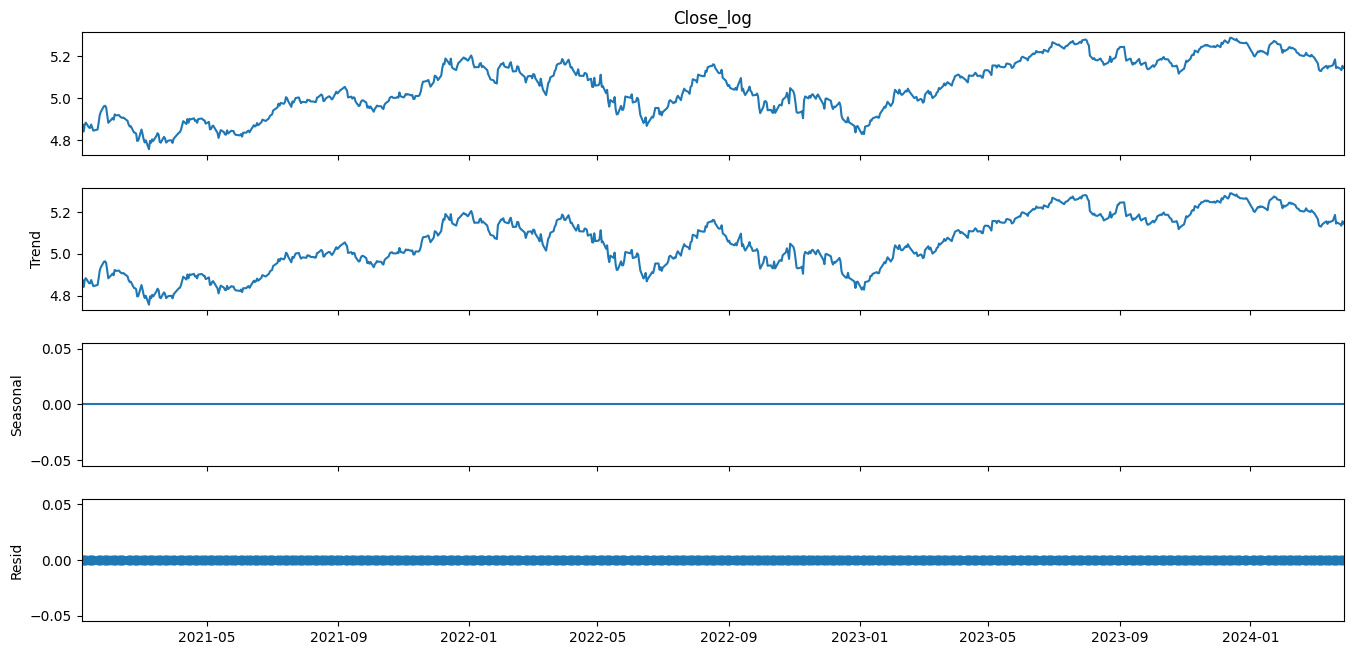

In [49]:
# 종가 데이터를 통해 확인 해보기

# 시계열 데이터 분해

# 1. 원본 데이터
# 2. Trend Component
# 3. Seasonal Component
# 4. residual Component

decomposition = sm.tsa.seasonal_decompose(df['Close_log'], model = 'additive', period = 1)

plot_decomposition = decomposition.plot()
plot_decomposition.set_size_inches(15, 7)
plt.show()

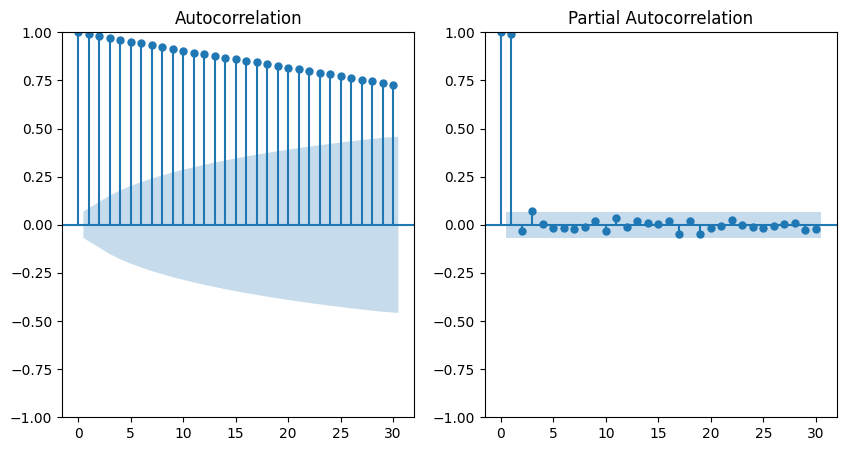

In [50]:
# 종가 데이터를 통해 확인 해보기

"""
ACF 해석 : MA(q) 지정
x 축 : 시점을 나타냄
y 축 : 자기 상관 계수를 나타냄
파란색 영역 : 신뢰 구간

* 따라서, x 가 0일 때, 자기 상관 계수가 1인 것을 확인.
* y값이 신뢰구간에 위치 x -> 비정상 시계열

--------------------------------------------------------------------------------------------

PACF 해석 : AR(p)지정

비정상 시계열로 판단하여, 추가 변환
"""

# ACF, PACF 시각화

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

plot_acf(df['Close_log'][1:].values, lags = 30, ax = ax[0])
plot_pacf(df['Close_log'][1:].values, lags = 30, ax = ax[1])

plt.show()

In [51]:
ADF_Test(df['Close_log'])

ADF Statistic(검정 통계량) : -2.1106
ADF p-value : 0.2403
1% : -3.438
5% : -2.865
10% : -2.569
귀무가설 채택 / 대립가설 기각 -> 비정상 시계열


In [52]:
KPSS_Test(df['Close_log'])

ADF Statistic(검정 통계량) : 2.4430
ADF p-value : 0.0100
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
귀무가설 기각 / 대립가설 채택 -> 비정상 시계열


<ipython-input-39-b7236fe5ba9b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(values)


In [53]:
# ADF 해석

# Q7-1. p-value를 통하여 정상성 판단해보기
# A7-1.
# ADF p-value(0.2403) 가 0.05 보다 크므로 비정상성 시계열 데이터 판단

# KPSS 해석

# Q7-2. p-value를 통하여 정상성 판단해보기
# A7-2.
# KPSS p-value(0.0100) 가 0.05 보다 작으므로 비정상성 시계열 데이터 판단

# Q7-3. 두 검정을 통해 얻은 결론
# A7-3. ADF 귀무가설 채택 % KPSS 귀무가설 기각 => non-stationary

#### 로그 차수 변환

In [54]:
df['Close_log_diff'] = df['Close_log'].diff()

plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
sns.lineplot(data = df, x = df.index, y = 'Close', label = 'Close')

plt.subplot(2, 1, 2)
sns.lineplot(data = df, x = df.index, y = 'Close_log_diff', label = 'Close_log_diff')

plt.show()

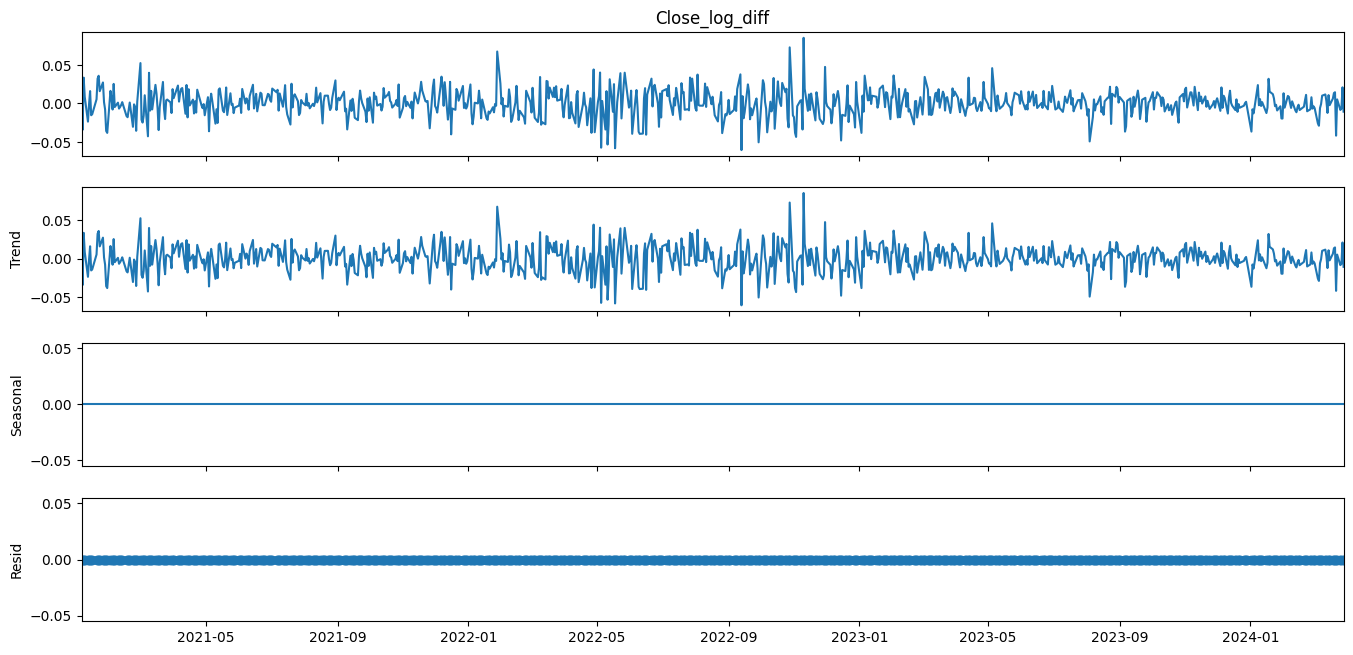

In [55]:
# 종가 데이터를 통해 확인 해보기

# 시계열 데이터 분해

# 1. 원본 데이터
# 2. Trend Component
# 3. Seasonal Component
# 4. residual Component

decomposition = sm.tsa.seasonal_decompose(df['Close_log_diff'][1:], model = 'additive', period = 1)

plot_decomposition = decomposition.plot()
plot_decomposition.set_size_inches(15, 7)
plt.show()

In [56]:
# 종가 데이터를 통해 확인 해보기


"""
ACF 해석 : MA(q) 지정
x 축 : 시점을 나타냄
y 축 : 자기 상관 계수를 나타냄
파란색 영역 : 신뢰 구간

* 따라서, x 가 0일 때, 자기 상관 계수가 1인 것을 확인.
* y값이 신뢰구간에 위치 -> 정상 시계열

0 시점 이후 0에 가까이 있으니 MA(0)
--------------------------------------------------------------------------------------------

PACF 해석 : AR(p)지정

0 시점 이후 0에 가까이 있으니 AR(0)

--------------------------------------------------------------------------------------------

1시점 기준으로 차분한 데이터 사용시 - AR(0), MA(0), ARMA(0, 0), ARIMA(0, 0, 0)
원본(차분하지 않은 데이터) 사용시 - ARIMA(0, 1, 0)
"""

# ACF, PACF 시각화

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

plot_acf(df['Close_log_diff'][1:].values, lags = 30, ax = ax[0])
plot_pacf(df['Close_log_diff'][1:].values, lags = 30, ax = ax[1])

plt.show()

In [57]:
ADF_Test(df['Close_log_diff'][1:])

ADF Statistic(검정 통계량) : -21.2684
ADF p-value : 0.0000
1% : -3.438
5% : -2.865
10% : -2.569
귀무가설 기각 / 대립가설 채택 -> 정상 시계열


In [58]:
KPSS_Test(df['Close_log_diff'][1:])

ADF Statistic(검정 통계량) : 0.0474
ADF p-value : 0.1000
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
귀무가설 채택 / 대립가설 기각 -> 정상 시계열


<ipython-input-39-b7236fe5ba9b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(values)


In [59]:
# ADF 해석

# Q8-1. p-value를 통하여 정상성 판단해보기
# A8-1.
# ADF p-value(0.0000) 가 0.05 보다 작으므로 정상성 시계열 데이터 판단

# KPSS 해석

# Q8-2. p-value를 통하여 정상성 판단해보기
# A8-2.
# KPSS p-value(0.1000) 가 0.05 보다 크므로 비정상성 시계열 데이터 판단

# Q8-3. 두 검정을 통해 얻은 결론
# A8-3. ADF 귀무가설 기각 % KPSS 귀무가설 채택 => stationary



#### 수익률 변환(퀀트/주식 상황)

---

일일(일일, 주간, 월간, 연간) 수익률(변화율) = (다음 값 - 현재 값) / 현재 값

* 주식/퀀트 데이터에서는 차분 값보다 수익률이 더욱 의미 있는 feature로 쓰인다.
* 값.pct_change()
* 값.pct_change() 파라미터 : https://wikidocs.net/157039

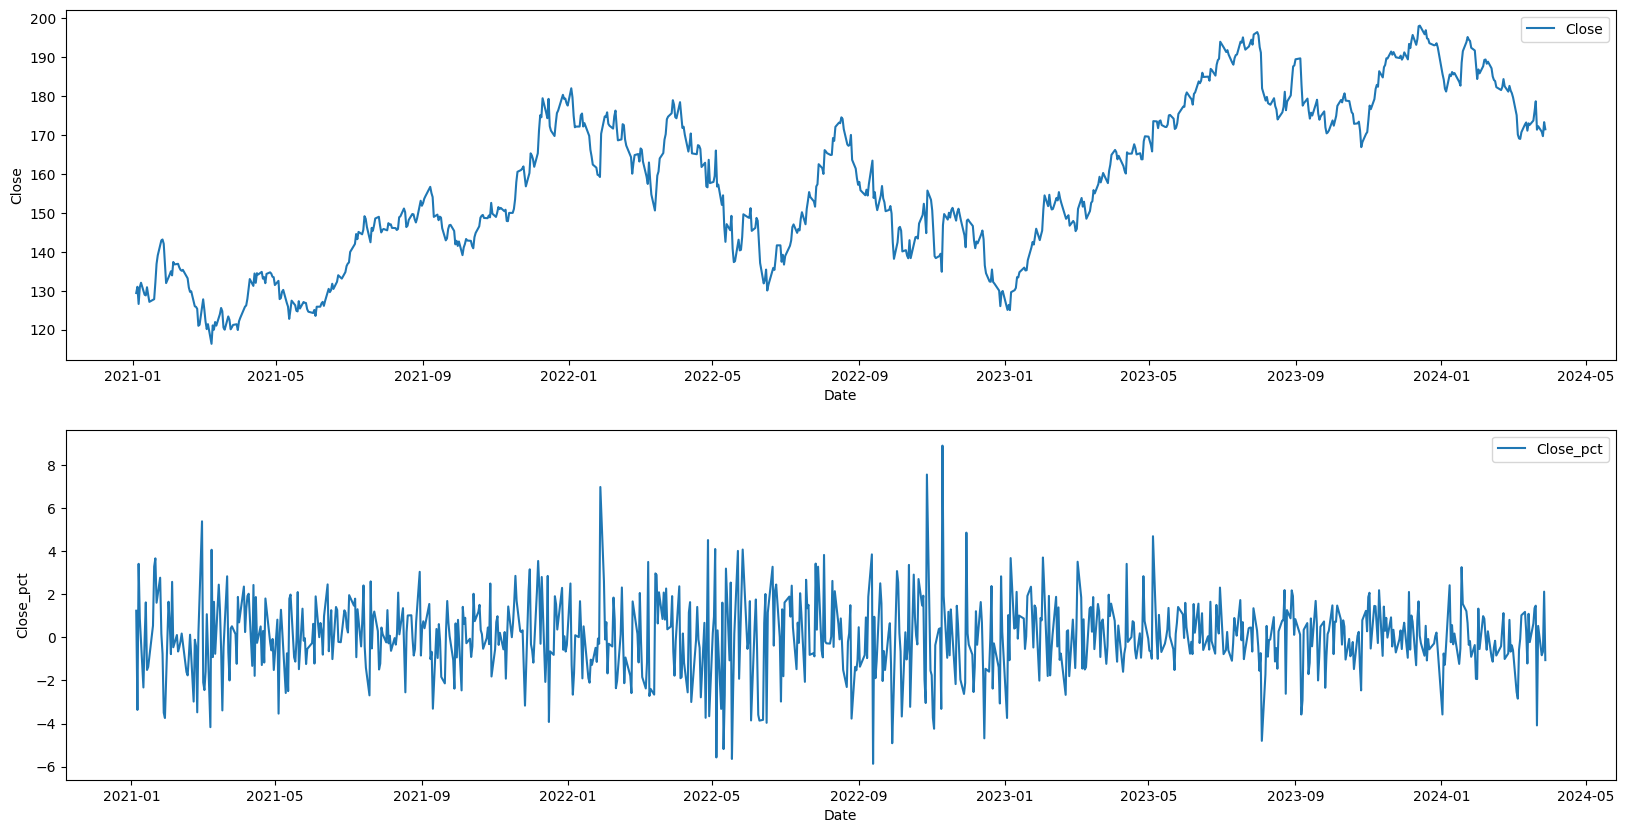

In [60]:
df['Close_pct'] = 100 * df['Close'].pct_change(periods = 1)

plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
sns.lineplot(data = df, x = df.index, y = 'Close', label = 'Close')

plt.subplot(2, 1, 2)
sns.lineplot(data = df, x = df.index, y = 'Close_pct', label = 'Close_pct')

plt.show()

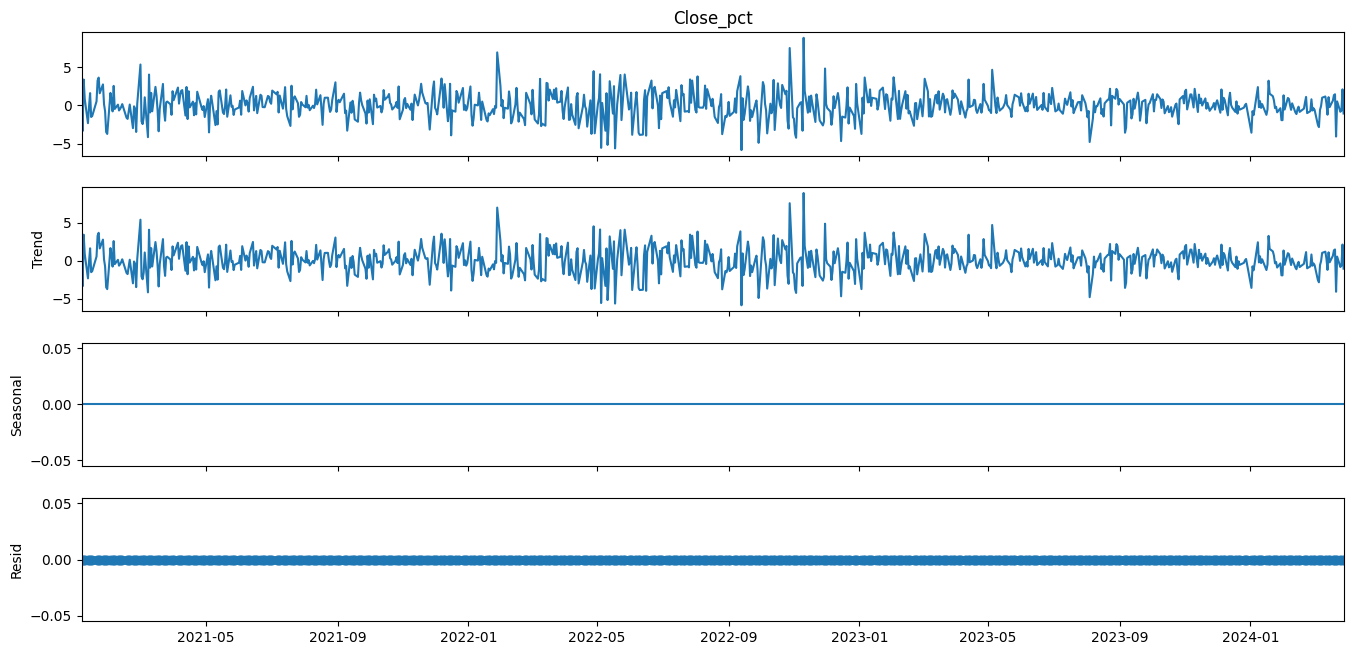

In [61]:
# 종가 데이터를 통해 확인 해보기

# 시계열 데이터 분해

# 1. 원본 데이터
# 2. Trend Component
# 3. Seasonal Component
# 4. residual Component

decomposition = sm.tsa.seasonal_decompose(df['Close_pct'][1:], model = 'additive', period = 1)

plot_decomposition = decomposition.plot()
plot_decomposition.set_size_inches(15, 7)
plt.show()

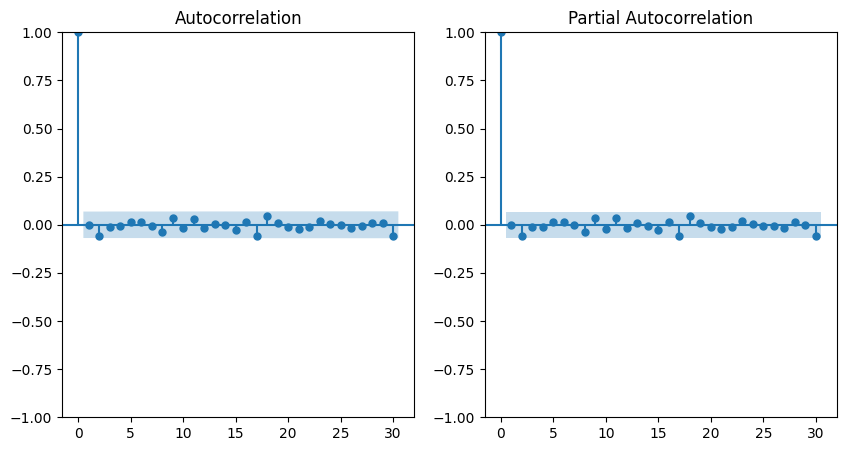

In [62]:
# 종가 데이터를 통해 확인 해보기


"""
ACF 해석 : MA(q) 지정
x 축 : 시점을 나타냄
y 축 : 자기 상관 계수를 나타냄
파란색 영역 : 신뢰 구간

* 따라서, x 가 0일 때, 자기 상관 계수가 1인 것을 확인.
* y값이 신뢰구간에 위치 -> 정상 시계열

0 시점 이후 0에 가까이 있으니 MA(0)
--------------------------------------------------------------------------------------------

PACF 해석 : AR(p)지정

0 시점 이후 0에 가까이 있으니 AR(0)

--------------------------------------------------------------------------------------------

1시점 기준으로 차분한 데이터 사용시 - AR(0), MA(0), ARMA(0, 0), ARIMA(0, 0, 0)
원본(차분하지 않은 데이터) 사용시 - ARIMA(0, 1, 0)
"""

# ACF, PACF 시각화

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

plot_acf(df['Close_pct'][1:].values, lags = 30, ax = ax[0])
plot_pacf(df['Close_pct'][1:].values, lags = 30, ax = ax[1])

plt.show()

In [63]:
ADF_Test(df['Close_pct'][1:])

ADF Statistic(검정 통계량) : -21.3104
ADF p-value : 0.0000
1% : -3.438
5% : -2.865
10% : -2.569
귀무가설 기각 / 대립가설 채택 -> 정상 시계열


In [64]:
KPSS_Test(df['Close_pct'][1:])

ADF Statistic(검정 통계량) : 0.0478
ADF p-value : 0.1000
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
귀무가설 채택 / 대립가설 기각 -> 정상 시계열


<ipython-input-39-b7236fe5ba9b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(values)


In [65]:
# ADF 해석

# Q9-1. p-value를 통하여 정상성 판단해보기
# A9-1.
# ADF p-value(0.0000) 가 0.05 보다 작으므로 정상성 시계열 데이터 판단

# KPSS 해석

# Q9-2. p-value를 통하여 정상성 판단해보기
# A9-2.
# KPSS p-value(0.1000) 가 0.05 보다 크므로 비정상성 시계열 데이터 판단

# Q9-3. 두 검정을 통해 얻은 결론
# A9-3. ADF 귀무가설 기각 % KPSS 귀무가설 채택 => stationary

# 시계열 데이터 예측

---

> 종가 데이터, 수익률 데이터를 활용

1. Autoregressive model(자기회귀 모델 또는 자기상관 모델, AR), Moving Average model(이동 평균 모델, MA)
2. ARIMA

## AR(자기회귀 모델), MA(이동 평균 모델)

---

**AR**
> 과거의 값이 현재의 값에 영향을 줄 때 사용하는 모델
* 간단히 말하면, 과거를 통해 미래를 예측 하는 모델.

**MA**
> 현재의 값을 과거의 모형 오차로 회귀 시키는 모델

**keywords**
> **백색 잡음**:
 * 평균 0
 * 분산 일정
 * 공분산도 0인 시계열
>
> **확률 보행(Random walk model)**:
 * 현재(t) = 어제(t-1) + 변화량
 * 전일의 값으로 현재의 값을 예측
>
> **표류가 있는 확률 보행(Random walk model with a drift)**:
* 확률 보행에서, 시간의 흐름에 따라 평균적으로 값이 증가하거나, 감소하는 형태 즉, **추세가 있음**

**LR(Likeihood Ratio) TEST**
> * Chi-square로 유의성 검증
* 일반적으로, Null hypothesis에 차수가 낮은 모형 설정

In [66]:
# Q10. 백색 잡음은 정상성 시계열 일까? 비정상성 시계열 일까?
# A10. 백색잡음은 정상성 시계열

# Q11. 확률 보행, 표류가 있는 확률 보행은 정상성 시계열 일까? 비정상성 시계열 일까?
#      비정상성 시계열 이라면, 해당 데이터에 행해야 하는 것은 무엇인가?

# A11. 비정상성 시계열 이다. / 차분을 진행한다.

In [67]:
# 필요 라이브러리 선언
from scipy.stats.distributions import chi2

In [68]:
df.head(3)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  126.830055   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.398178   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.076103   

               Volume  SMA_5  SMA_20  SMA_60  SMA_120  ...  MACD_Short  \
Date                                                   ...               
2021-01-04  143301900    NaN     NaN     NaN      NaN  ...  129.410004   
2021-01-05   97664900    NaN     NaN     NaN      NaN  ...  130.276666   
2021-01-06  155088000    NaN     NaN     NaN      NaN  ...  128.841662   

             MACD_Long      MACD  MACD_Signal  MACD_Sign  MACD_Oscillator  \
Date                                                                        
2021-01-04  129.410004  0.000000     0.000000         매도         0.000000   
2021-01-05  130.240769  0.035897     0.019943         매도         0.015954   
2021-01-06  128.932675 -0.091014    -0.025531         매도        -0.065482   

            Close_diff  Close_log  Close_log_diff  Close_pct  
Date                                                          
2021-01-04         NaN   4.862986             NaN        NaN  
2021-01-05    1.599991   4.875274        0.012288   1.236374  
2021-01-06   -4.409997   4.841032       -0.034241  -3.366153  

[3 rows x 31 columns]

In [69]:
# Close_diff 를 활용

close_diff_values = df['Close_diff'].values[1:]

# AR(0)
model_ar_0 = ARIMA(close_diff_values, order = (0, 0, 0))
result_ar_0 = model_ar_0.fit()
display(result_ar_0.summary())

# AR(1)
model_ar_1 = ARIMA(close_diff_values, order = (1, 0, 0))
result_ar_1 = model_ar_1.fit()
display(result_ar_1.summary())

# AR(2)
model_ar_2 = ARIMA(close_diff_values, order = (2, 0, 0))
result_ar_2 = model_ar_2.fit()
display(result_ar_2.summary())

# AR(3)
model_ar_3 = ARIMA(close_diff_values, order = (3, 0, 0))
result_ar_3 = model_ar_3.fit()
display(result_ar_3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  813
Model:                          ARIMA   Log Likelihood               -1943.213
Date:                Mon, 27 May 2024   AIC                           3890.425
Time:                        14:25:33   BIC                           3899.827
Sample:                             0   HQIC                          3894.034
                                - 813                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0517      0.093      0.559      0.576      -0.130       0.233
sigma2         6.9760      0.262     26.659      0.000       6.463       7.489
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                76.02
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.02
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  813
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1943.161
Date:                Mon, 27 May 2024   AIC                           3892.321
Time:                        14:25:34   BIC                           3906.424
Sample:                             0   HQIC                          3897.735
                                - 813                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0517      0.094      0.552      0.581      -0.132       0.236
ar.L1          0.0113      0.031      0.362      0.717      -0.050       0.072
sigma2         6.9751      0.272     25.672      0.000       6.443       7.508
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.90
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.02
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  813
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1942.193
Date:                Mon, 27 May 2024   AIC                           3892.387
Time:                        14:25:34   BIC                           3911.189
Sample:                             0   HQIC                          3899.604
                                - 813                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0518      0.090      0.574      0.566      -0.125       0.229
ar.L1          0.0120      0.031      0.384      0.701      -0.049       0.073
ar.L2         -0.0489      0.035     -1.401      0.161      -0.117       0.019
sigma2         6.9584      0.271     25.656      0.000       6.427       7.490
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.12
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.04
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  813
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1942.184
Date:                Mon, 27 May 2024   AIC                           3894.367
Time:                        14:25:35   BIC                           3917.871
Sample:                             0   HQIC                          3903.390
                                - 813                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0518      0.090      0.576      0.565      -0.124       0.228
ar.L1          0.0117      0.032      0.372      0.710      -0.050       0.074
ar.L2         -0.0488      0.035     -1.396      0.163      -0.117       0.020
ar.L3         -0.0049      0.034     -0.144      0.886      -0.071       0.061
sigma2         6.9583      0.272     25.550      0.000       6.425       7.492
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                77.92
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.04
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
def LR_test(model_1, model_2, DF = 1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2 * (L2 - L1))
    p = chi2.sf(LR, DF).round(3)
    return p

print(LR_test(model_ar_0, model_ar_1))
print(LR_test(model_ar_1, model_ar_2))
print(LR_test(model_ar_2, model_ar_3))

0.747
0.164
0.89


In [71]:
# Q12. LR_test 를 통해 AR()의 p의 값으로 될 가능성이 높은것은? (0.05 보다 높으므로, 통계적으로 유의미 하지는 않음)
# A12. 1

In [72]:
# 수익률 데이터를 활용

close_diff_values = df['Close_diff'].values[1:]


# MA(0)
model_ma_0 = ARIMA(close_diff_values, order = (0, 0, 0))
result_ma_0 = model_ma_0.fit()
display(result_ma_0.summary())

# MA(1)
model_ma_1 = ARIMA(close_diff_values, order = (0, 0, 1))
result_ma_1 = model_ma_1.fit()
display(result_ma_1.summary())

# MA(2)
model_ma_2 = ARIMA(close_diff_values, order = (0, 0, 2))
result_ma_2 = model_ma_2.fit()
display(result_ma_2.summary())

# MA(3)
model_ma_3 = ARIMA(close_diff_values, order = (0, 0, 3))
result_ma_3 = model_ma_3.fit()
display(result_ma_3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  813
Model:                          ARIMA   Log Likelihood               -1943.213
Date:                Mon, 27 May 2024   AIC                           3890.425
Time:                        14:25:37   BIC                           3899.827
Sample:                             0   HQIC                          3894.034
                                - 813                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0517      0.093      0.559      0.576      -0.130       0.233
sigma2         6.9760      0.262     26.659      0.000       6.463       7.489
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                76.02
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.02
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  813
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1943.155
Date:                Mon, 27 May 2024   AIC                           3892.310
Time:                        14:25:37   BIC                           3906.412
Sample:                             0   HQIC                          3897.724
                                - 813                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0517      0.094      0.551      0.581      -0.132       0.236
ma.L1          0.0125      0.031      0.401      0.689      -0.049       0.074
sigma2         6.9749      0.272     25.684      0.000       6.443       7.507
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                79.21
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.02
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  813
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1942.168
Date:                Mon, 27 May 2024   AIC                           3892.335
Time:                        14:25:38   BIC                           3911.138
Sample:                             0   HQIC                          3899.553
                                - 813                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0518      0.090      0.575      0.565      -0.125       0.228
ma.L1          0.0116      0.031      0.368      0.713      -0.050       0.073
ma.L2         -0.0501      0.035     -1.452      0.146      -0.118       0.018
sigma2         6.9580      0.272     25.612      0.000       6.426       7.490
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.32
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.05
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  813
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1942.162
Date:                Mon, 27 May 2024   AIC                           3894.324
Time:                        14:25:38   BIC                           3917.828
Sample:                             0   HQIC                          3903.346
                                - 813                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0518      0.090      0.576      0.564      -0.124       0.228
ma.L1          0.0117      0.032      0.370      0.711      -0.050       0.074
ma.L2         -0.0500      0.035     -1.437      0.151      -0.118       0.018
ma.L3         -0.0038      0.033     -0.112      0.910      -0.069       0.062
sigma2         6.9578      0.272     25.534      0.000       6.424       7.492
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.18
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.05
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
def LR_test(model_1, model_2, DF = 1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2 * (L2 - L1))
    p = chi2.sf(LR, DF).round(3)
    return p

print(LR_test(model_ma_0, model_ma_1))
print(LR_test(model_ma_1, model_ma_2))
print(LR_test(model_ma_2, model_ma_3))

0.735
0.16
0.915


In [74]:
# Q13. LR_test 를 통해 AR()의 p의 값으로 될 가능성이 높은것은? (0.05 보다 높으므로, 통계적으로 유의미 하지는 않음)
# A13. 1

## ARIMA(AutoRegressive Integrated Moving Average)


---

* ARMA 모델 + 데이터 차분 과정
* AR(p) -> ARIMA(p, 0, 0)
* MA(q) -> ARIMA(0, 0, q)
* ARMA(p, q) -> ARIMA(p, 0, q)
* ARIMA(p, q, d)에서 d 는 차분 기간

In [75]:
# 위에서 ARMA 를 활용 하였을때, Close의 1차 차분한 데이터인 Close_diff 를 사용 하였으니,
# 해당 부분에서는, Close 데이터를 통하여 모델링 해보기

# 종가 데이터 값 가져오기
# 전체 종가 데이터중 마지막 20일(1달)의 값 test, 나머지는 train으로 분할

train = df['Close'][:-20]
test = df['Close'][-20:]

train.shape, test.shape

((794,), (20,))

In [76]:
# ARIMA 모델을 사용하기에 앞서,

# Q14-1. Close 데이터는 정상 시계열 (O / X)
# A14-1. X(비정상 시계열)

# Q14-2. Close 데이터는 계절성을 띄는가 (O / X)
# A14-2. X

# Q14-3. Close 데이터를 몇차 차수 변환 하여야 할까? (위에, 정상성 판단, 정상성 데이터 변환 다시 확인 후 답하기)
# Q14-3. 1차 차수 변환

# Q14-4. Close 데이터를 통해, ARIMA 모델을 구현하려고 할때, p, q, d에 적합한 파라미터 들은? (위에, 정상성 판단, 정상성 데이터 변환 다시 확인 후 답하기)
# 약한 관계 까지도 답변 하기 (hint : 4개)
# A14-4. ARIMA(0, 1, 0) 또는 ARIMA(2, 1, 0), ARIMA(0, 1, 2), ARIMA(2, 1, 2)

In [77]:
# 해당 부분에서는, train, test를 통하여 모델링 해보기

# 모형 4종류 각각 모델 만들어 보기


# ARIMA(2, 1, 0)
model_arima_210 = ARIMA(train, order = (2, 1, 0))
result_model_arima_210 = model_arima_210.fit()
display(result_model_arima_210.summary())

# ARIMA(0, 1, 2)
model_arima_012 = ARIMA(train, order = (0, 1, 2))
result_model_arima_012 = model_arima_012.fit()
display(result_model_arima_012.summary())

# ARIMA(2, 1, 2)
model_arima_212 = ARIMA(train, order = (2, 1, 2))
result_model_arima_212 = model_arima_212.fit()
display(result_model_arima_212.summary())

# ARIMA(0, 1, 0)
model_arima_010 = ARIMA(train, order = (0, 1, 0))
result_model_arima_010 = model_arima_010.fit()
display(result_model_arima_010.summary())



# 최적의 회귀 모델 선택 할 때 확인 하는 지표 : AIC, BIC
# https://acdongpgm.tistory.com/99 참고

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  794
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1893.710
Date:                Mon, 27 May 2024   AIC                           3793.420
Time:                        14:25:40   BIC                           3807.447
Sample:                             0   HQIC                          3798.811
                                - 794                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0118      0.032      0.375      0.708      -0.050       0.074
ar.L2         -0.0508      0.035     -1.463      0.144      -0.119       0.017
sigma2         6.9461      0.273     25.412      0.000       6.410       7.482
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.64
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.02
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  794
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1893.699
Date:                Mon, 27 May 2024   AIC                           3793.399
Time:                        14:25:41   BIC                           3807.426
Sample:                             0   HQIC                          3798.790
                                - 794                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0114      0.032      0.357      0.721      -0.051       0.074
ma.L2         -0.0514      0.034     -1.494      0.135      -0.119       0.016
sigma2         6.9459      0.274     25.364      0.000       6.409       7.483
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.83
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.03
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  794
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1893.137
Date:                Mon, 27 May 2024   AIC                           3796.274
Time:                        14:25:43   BIC                           3819.653
Sample:                             0   HQIC                          3805.259
                                - 794                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2456      0.588     -0.417      0.676      -1.399       0.908
ar.L2          0.4760      0.558      0.852      0.394      -0.618       1.570
ma.L1          0.2544      0.580      0.438      0.661      -0.883       1.392
ma.L2         -0.5215      0.559     -0.933      0.351      -1.617       0.574
sigma2         6.9361      0.278     24.953      0.000       6.391       7.481
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                77.05
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.04
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  794
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1894.784
Date:                Mon, 27 May 2024   AIC                           3791.568
Time:                        14:25:43   BIC                           3796.244
Sample:                             0   HQIC                          3793.365
                                - 794                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.9650      0.264     26.402      0.000       6.448       7.482
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                76.16
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.00
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
# Q15. 위 4가지 모형중 최적의 ARIMA 파라미터는 무엇인가?
# A15. ARIMA(0, 1, 0)

In [79]:
train

Date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
                 ...    
2024-02-23    182.520004
2024-02-26    181.160004
2024-02-27    182.630005
2024-02-28    181.419998
2024-02-29    180.750000
Name: Close, Length: 794, dtype: float64

In [80]:
# 최적의 ARIMA 모델로 예측

train_pred = result_model_arima_010.predict(start = train.index[0])
train_pred

Date
2021-01-04      0.000000
2021-01-05    129.410004
2021-01-06    131.009995
2021-01-07    126.599998
2021-01-08    130.919998
                 ...    
2024-02-23    184.369995
2024-02-26    182.520004
2024-02-27    181.160004
2024-02-28    182.630005
2024-02-29    181.419998
Name: predicted_mean, Length: 794, dtype: float64

0.9331351190969466
28.048101651093873
2.152329763224147


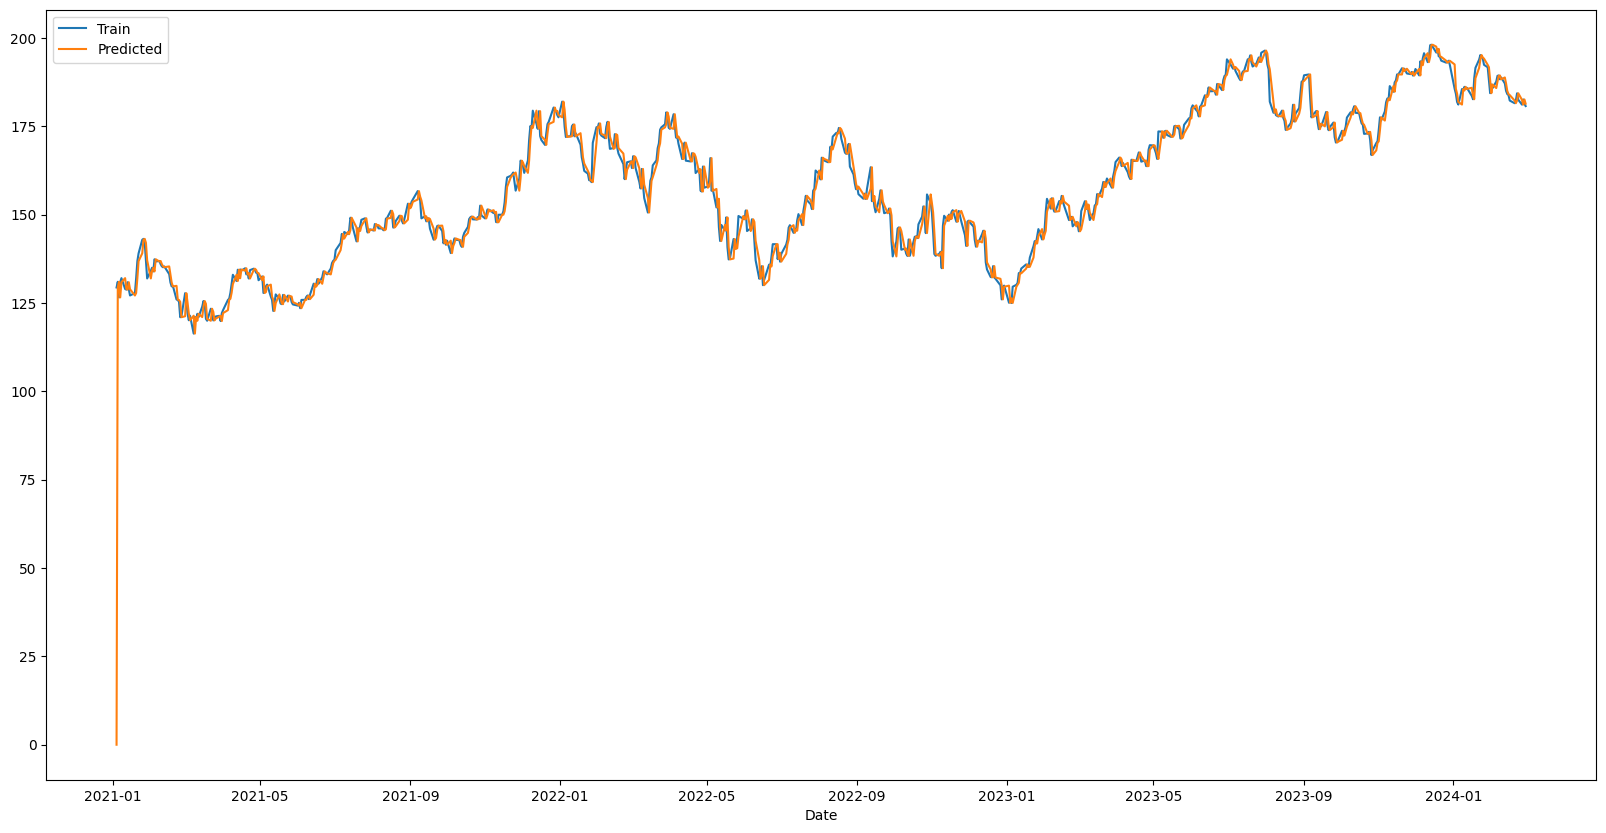

In [81]:
# train와 train_pred 비교
# r2_score, mse, mae 로 확인

from sklearn.metrics import *

print(r2_score(train, train_pred))
print(mean_squared_error(train, train_pred))
print(mean_absolute_error(train, train_pred))

plt.figure(figsize = (20, 10))

sns.lineplot(x = train.index, y = train.values, label = 'Train')
sns.lineplot(x = train.index, y = train_pred.values, label = 'Predicted')

plt.legend()
plt.show()

0.924620719754511
3.9459801586439647
1.5550009400000004


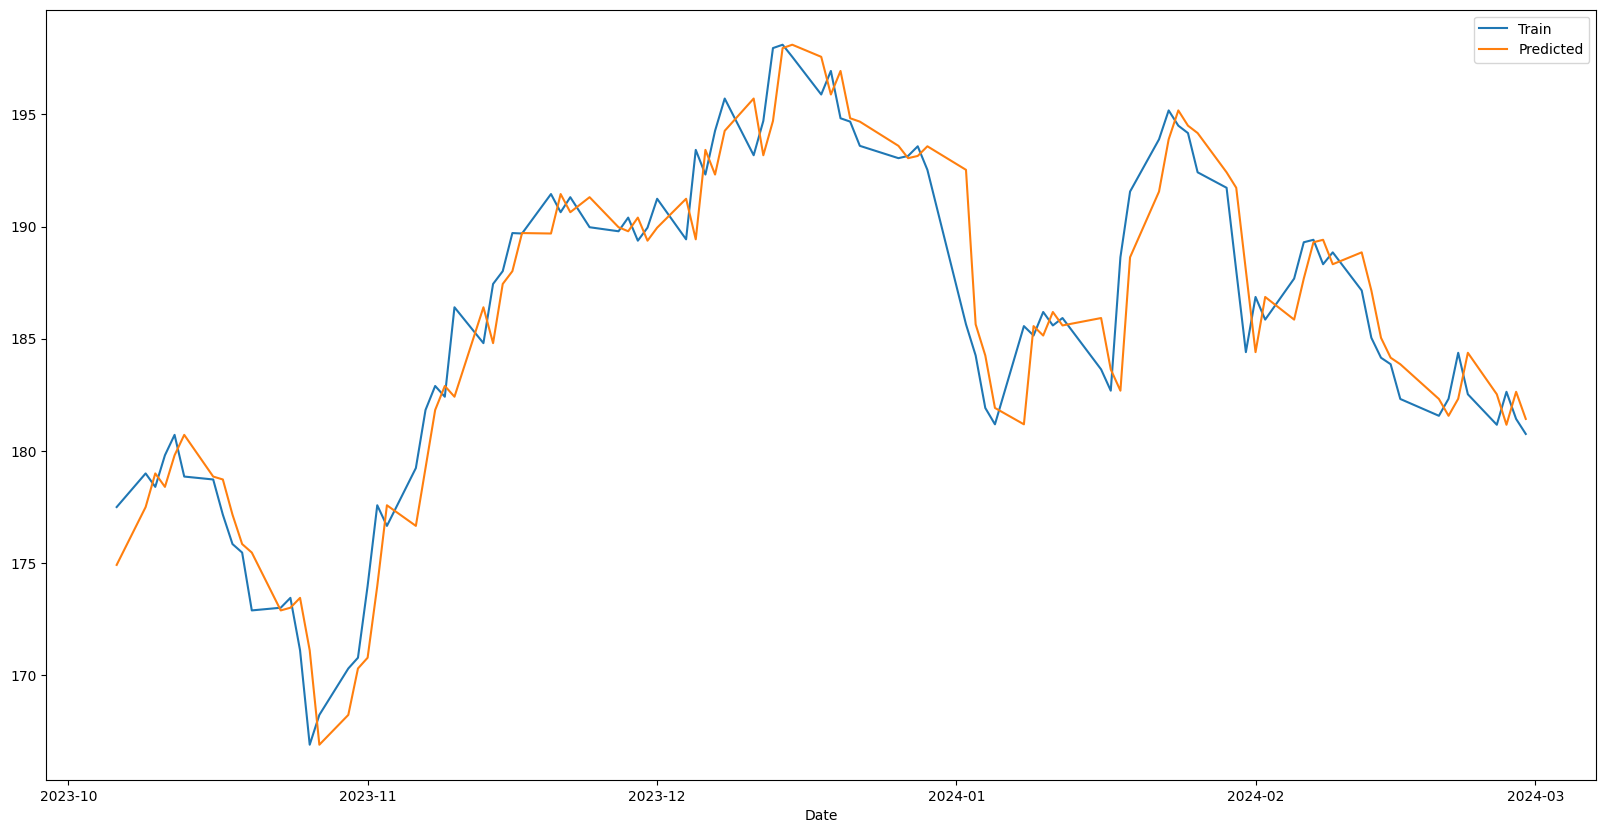

In [82]:
# train와 train_pred 확대 비교
# r2_score, mse, mae 로 확인

from sklearn.metrics import *

print(r2_score(train[-100:], train_pred[-100:]))
print(mean_squared_error(train[-100:], train_pred[-100:]))
print(mean_absolute_error(train[-100:], train_pred[-100:]))

plt.figure(figsize = (20, 10))

sns.lineplot(x = train[-100:].index, y = train[-100:].values, label = 'Train')
sns.lineplot(x = train[-100:].index, y = train_pred[-100:].values, label = 'Predicted')

plt.legend()
plt.show()

1.0
8.159530979255719e-30
2.8708797404448495e-16


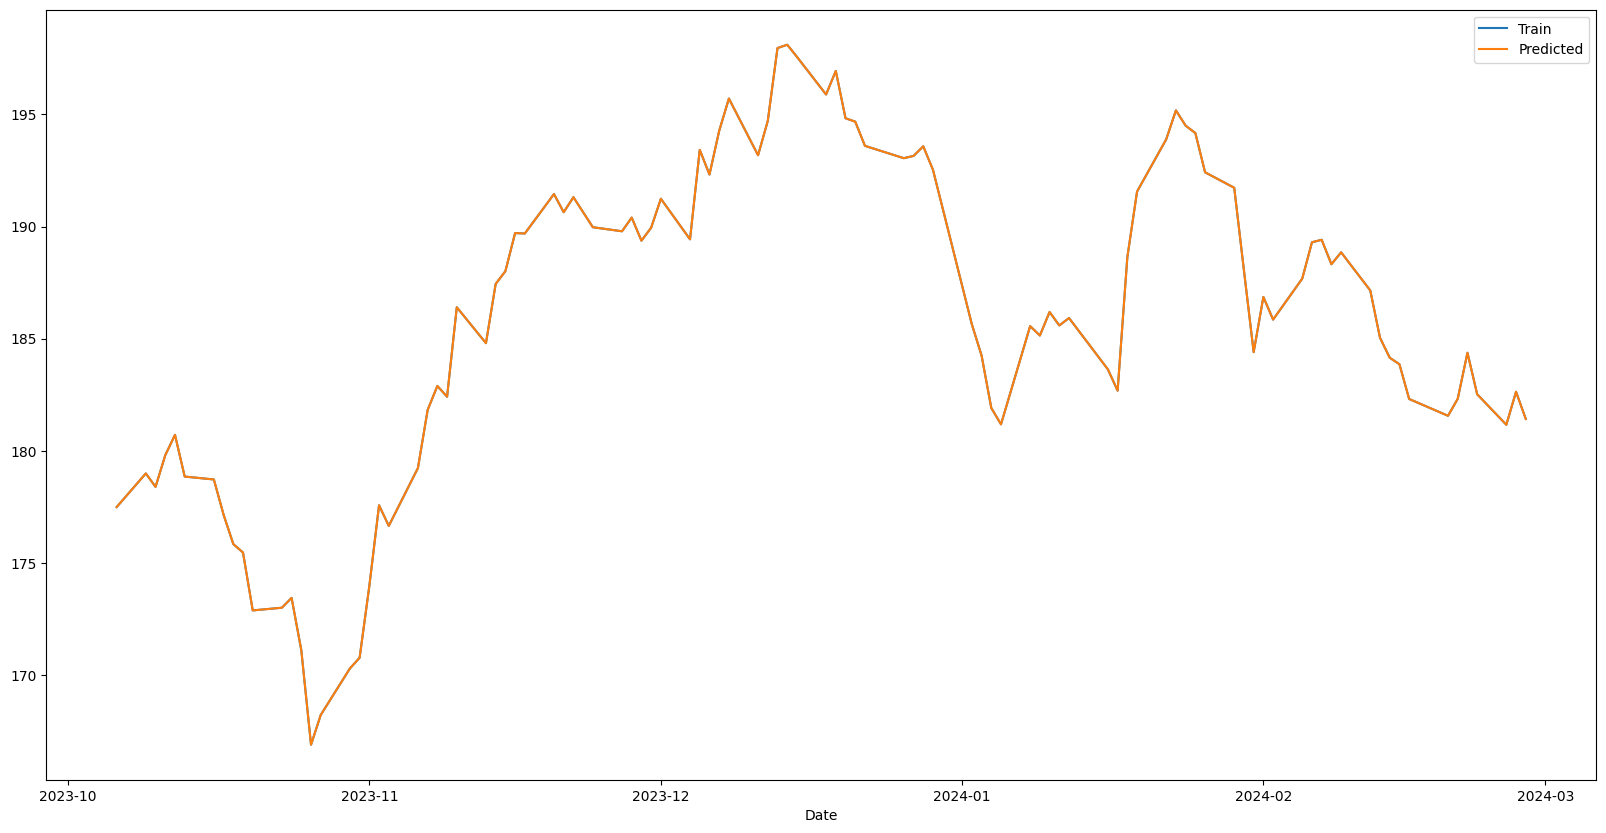

In [83]:
# train와 train_pred 확대 + shift 비교
# r2_score, mse, mae 로 확인

from sklearn.metrics import *

print(r2_score(train[-100:][:-1], train_pred[-100:].shift(-1)[:-1]))
print(mean_squared_error(train[-100:][:-1], train_pred[-100:].shift(-1)[:-1]))
print(mean_absolute_error(train[-100:][:-1], train_pred[-100:].shift(-1)[:-1]))

plt.figure(figsize = (20, 10))

sns.lineplot(x = train[-100:][:-1].index, y = train[-100:][:-1].values, label = 'Train')
sns.lineplot(x = train_pred[-100:].shift(-1)[:-1].index, y = train_pred[-100:].shift(-1)[:-1].values, label = 'Predicted')

plt.legend()
plt.show()

In [84]:
# Q16. 이를 통해 알 수 있는 내용은?
# A16. 전일 데이터를 근거로 현재를 예측하는 것처럼. shift를 한 것과 유사하도록 모델이 추론을 한 것이다.

In [85]:
# 최적의 ARIMA 모델로 미래 시점 예측

pred = result_model_arima_010.predict(start = len(train) - 1, end = len(train) + len(test) - 1)[1:]
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


794    180.75
795    180.75
796    180.75
797    180.75
798    180.75
799    180.75
800    180.75
801    180.75
802    180.75
803    180.75
804    180.75
805    180.75
806    180.75
807    180.75
808    180.75
809    180.75
810    180.75
811    180.75
812    180.75
813    180.75
Name: predicted_mean, dtype: float64

-8.191115265556217
72.77706441901623
8.053500300000001


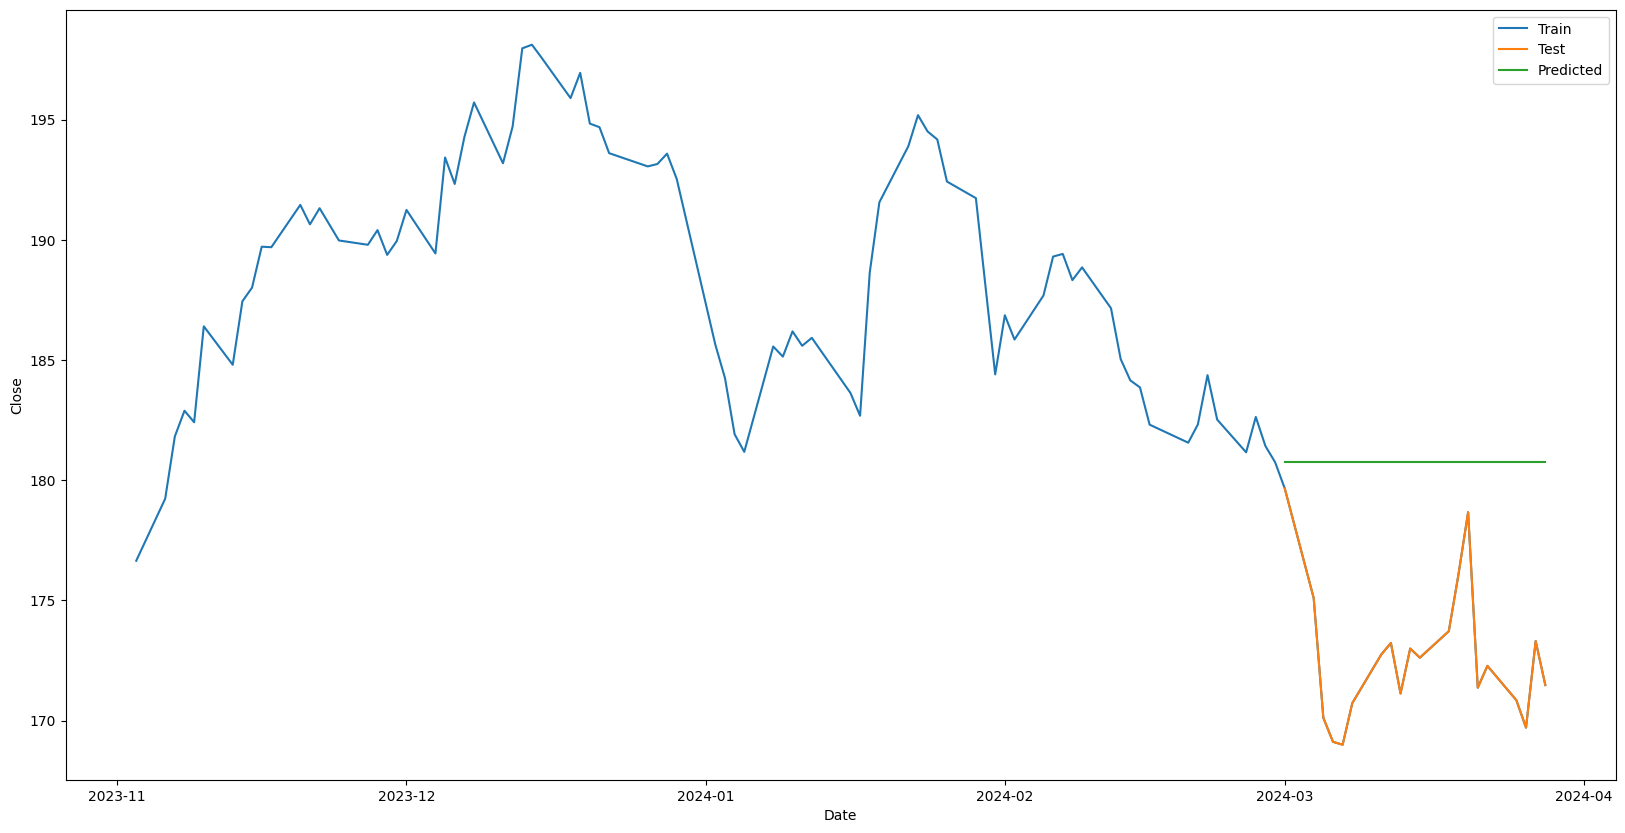

In [86]:
# 예측 데이터와 평가 데이터 비교
# r2_score, mse, mae 로 확인

from sklearn.metrics import *

print(r2_score(test, pred))
print(mean_squared_error(test, pred))
print(mean_absolute_error(test, pred))


# 최근 100일 데이터만 사용하여 비교 시각화.

df_100d = df.iloc[-100:]

plt.figure(figsize = (20, 10))

sns.lineplot(data = df_100d, x = df_100d.index, y = df_100d['Close'], label = 'Train')
sns.lineplot(data = df_100d[-20:], x = df_100d[-20:].index, y = test, label = 'Test')
sns.lineplot(data = df_100d[-20:], x = df_100d[-20:].index, y = pred, label = 'Predicted')

plt.legend()
plt.show()

In [87]:
# Q16. 예측 결과가 이상하다고 생각이 든다면, 무엇때문일까?
# A16. 추세(Trend Component)만이 고려된 예측이다. / 변동폭이 없다.

In [88]:
# 해당 부분에서는, Close 데이터를 통하여 모델링 해보기

# 최적의 p, q, d를 찾기 위한 auto_arima 모델 사용
auto_arima_model = auto_arima(train, start_p = 0, start_q = 0, start_d = 0, max_p = 3, max_q = 3, max_d = 3,
                              seasonal = False, trace = True)


# [중요] auto_arima 를 통해 얻은 p, q, d와 직접 검증 및 시각화를 통해 얻은 p, q, d를 비교 해보기

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3793.091, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3795.002, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3794.992, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3791.568, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3794.636, Time=0.49 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.836 seconds


In [89]:
auto_arima_model.predict(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


794    180.75
795    180.75
796    180.75
797    180.75
798    180.75
799    180.75
800    180.75
801    180.75
802    180.75
803    180.75
804    180.75
805    180.75
806    180.75
807    180.75
808    180.75
809    180.75
810    180.75
811    180.75
812    180.75
813    180.75
dtype: float64

In [90]:
# 모델 적합성 검증 - 1
# AIC - 모델 평가지표
# 잔차에 대한 통계량 : Ljung-Box(Q), Heteroskedasticity(H), Jarque-Bera(JB)

"""
Ljung-Box(Q)
귀무가설 : 잔차가 백색잡음이다.
대립가설 : 잔차가 백색잡음이 아니다.

Prob(Q) > 0.05
귀무가설 채택 / 대립가설 기각 -> 잔차가 백색잡음이다 == 정상 시계열

Heteroskedasticity(H)
귀무가설 : 잔차가 이분산을 띄지 않는다.
대립가설 : 잔차가 이분산을 띈다.

Prob(H) > 0.05
귀무가설 채택 / 대립가설 기각 -> 잔차가 이분산을 띄지 않는다.


Jarque-Bera(JB)
귀무가설 : 잔차가 정규성을 만족한다.
대립가설 : 잔차가 정규성을 만족하지 않는다.

Prob(JB) < 0.05

귀무가설 기각 / 대립가설 채택 -> 잔차가 정규성을 만족하지 않는다

"""
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  794
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1894.784
Date:                Mon, 27 May 2024   AIC                           3791.568
Time:                        14:25:50   BIC                           3796.244
Sample:                             0   HQIC                          3793.365
                                - 794                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.9650      0.264     26.402      0.000       6.448       7.482
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                76.16
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.00
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

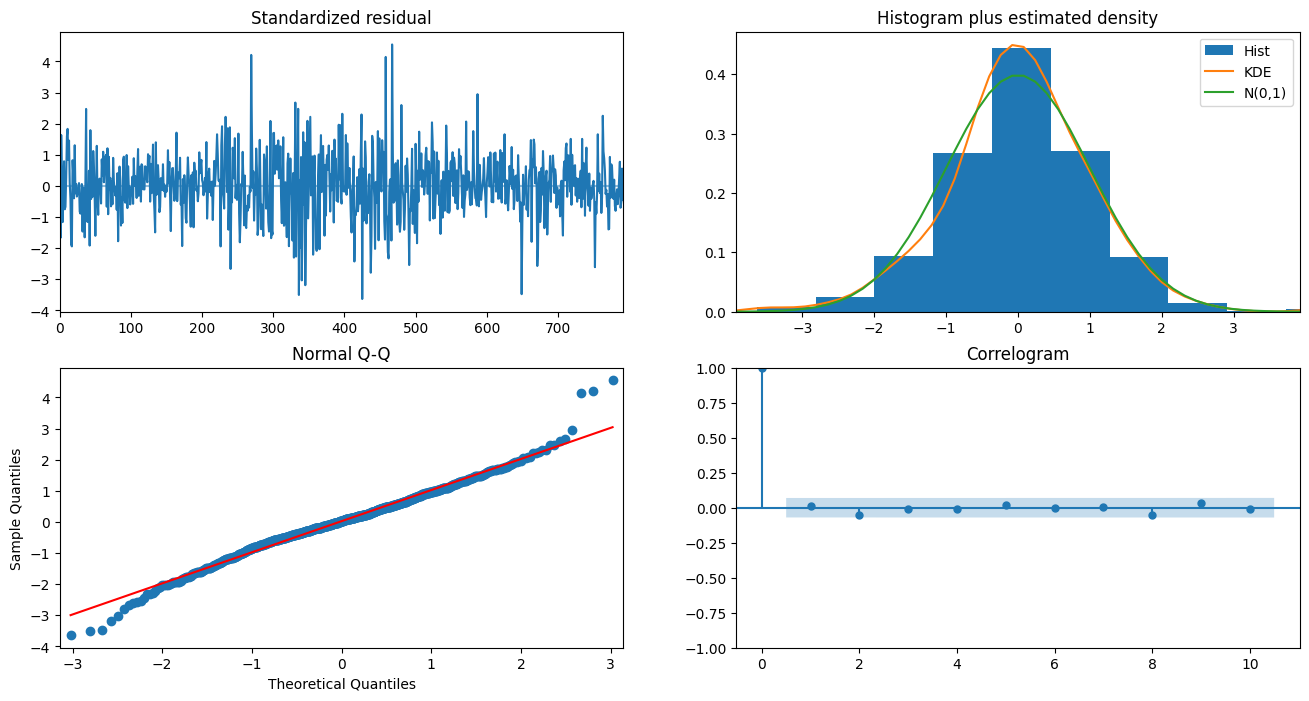

In [91]:
# 모델 적합성 검증 - 2

"""
잔차의 정상성

1번 그림(왼쪽 위) : 잔차의 시계열 데이터, 0을 중심으로 위치한 것을 확인 == 백색잡음
4번 그림(오른쪽 아래) : 잔차에 대한 ACF, 1시점 이후 신뢰구간에 위치하므로 자기상관이 없음을 확인

잔차의 정규성

3번 그림(왼쪽 아래) : 빨간선 바깥에 나가는 값들이 존재 = 정규성 x
2번 그림(오른쪽 아래) : 정규분포(평균 = 0, 분산 = 1)와 비교 그래프

"""
auto_arima_model.plot_diagnostics(figsize = (16, 8))
plt.show()

In [93]:
# 계절성을 추가 SARIMA의 파라미터 찾기

auto_sarima_model = auto_arima(train, start_p = 0, start_q = 0, start_d = 0, max_p = 3, max_q = 3, max_d = 3,
                              seasonal = True, m = 12, trace = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3794.786, Time=2.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3793.091, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3796.334, Time=1.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3796.336, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3791.568, Time=0.09 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=3794.441, Time=0.66 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=3794.455, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3795.002, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3794.992, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=3794.636, Time=1.64 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 8.517 seconds


In [94]:
auto_sarima_model.predict(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


794    180.75
795    180.75
796    180.75
797    180.75
798    180.75
799    180.75
800    180.75
801    180.75
802    180.75
803    180.75
804    180.75
805    180.75
806    180.75
807    180.75
808    180.75
809    180.75
810    180.75
811    180.75
812    180.75
813    180.75
dtype: float64

In [95]:
auto_sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  794
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1894.784
Date:                Mon, 27 May 2024   AIC                           3791.568
Time:                        14:29:19   BIC                           3796.244
Sample:                             0   HQIC                          3793.365
                                - 794                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.9650      0.264     26.402      0.000       6.448       7.482
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                76.16
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.00
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 추가로 계절성이 있는 데이터 ARIMA로 해보기

In [96]:
flights = sns.load_dataset('flights')
flights.head(3)

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132

<Axes: >

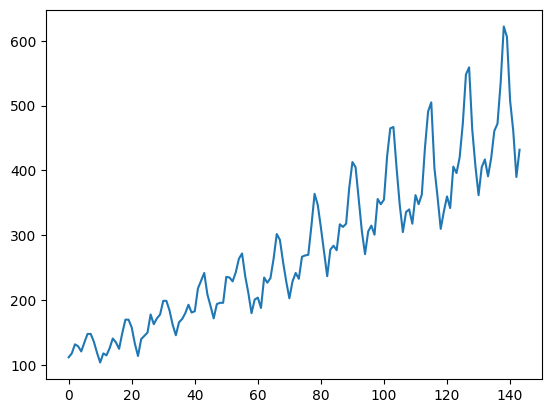

In [101]:
# 계절성 확인

flights['passengers'].plot()

In [97]:
# 계절성이 없고, 추세만 있는 ARIMA 모델 사용

passengers = flights['passengers']

flights_auto_arima_model = auto_arima(passengers, start_p = 0, start_q = 0, start_d = 0, max_p = 3, max_q = 3, max_d = 3,
                              seasonal = False, trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=1.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.62 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.47 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.49 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [102]:
passengers_pred = flights_auto_arima_model.predict(20)
passengers_pred

144    487.932733
145    494.134453
146    502.467199
147    488.099607
148    485.414079
149    476.553735
150    478.102790
151    476.100075
152    479.144621
153    478.661235
154    480.347004
155    479.576505
156    480.169563
157    479.467459
158    479.767045
159    479.382648
160    479.631660
161    479.451589
162    479.627479
163    479.521822
dtype: float64

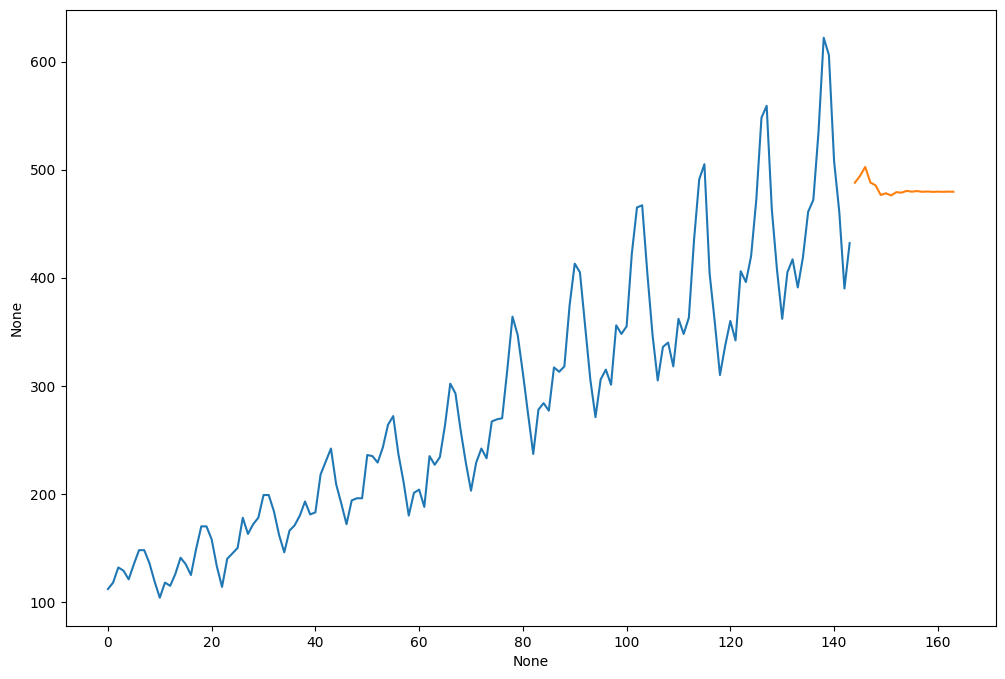

In [103]:
# 추세를 따라가는 것 같아 보이지만, 예측 정확도가 높다고 설명할 수 없다.

plt.figure(figsize = (12, 8))

sns.lineplot(x = passengers.index, y = passengers.values)
sns.lineplot(x = passengers_pred.index, y = passengers_pred)

plt.show()

In [104]:
# 계절성을 포함한 SARIMA 모델 사용

passengers = flights['passengers']

flights_auto_sarima_model = auto_arima(passengers, start_p = 0, start_q = 0, start_d = 0, max_p = 3, max_q = 3, max_d = 3,
                              seasonal = True, m = 12, trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.69 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.76 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.61 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.63 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.04 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.60 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=1.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.39 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=4.84 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [105]:
passengers_pred = flights_auto_sarima_model.predict(20)
passengers_pred

144    451.347077
145    427.102222
146    463.382490
147    499.705771
148    514.035526
149    571.851868
150    661.310509
151    648.081675
152    551.284692
153    501.068280
154    434.052984
155    479.233768
156    495.569171
157    469.578457
158    497.955025
159    544.916439
160    556.350008
161    616.910053
162    708.165788
163    689.435154
dtype: float64

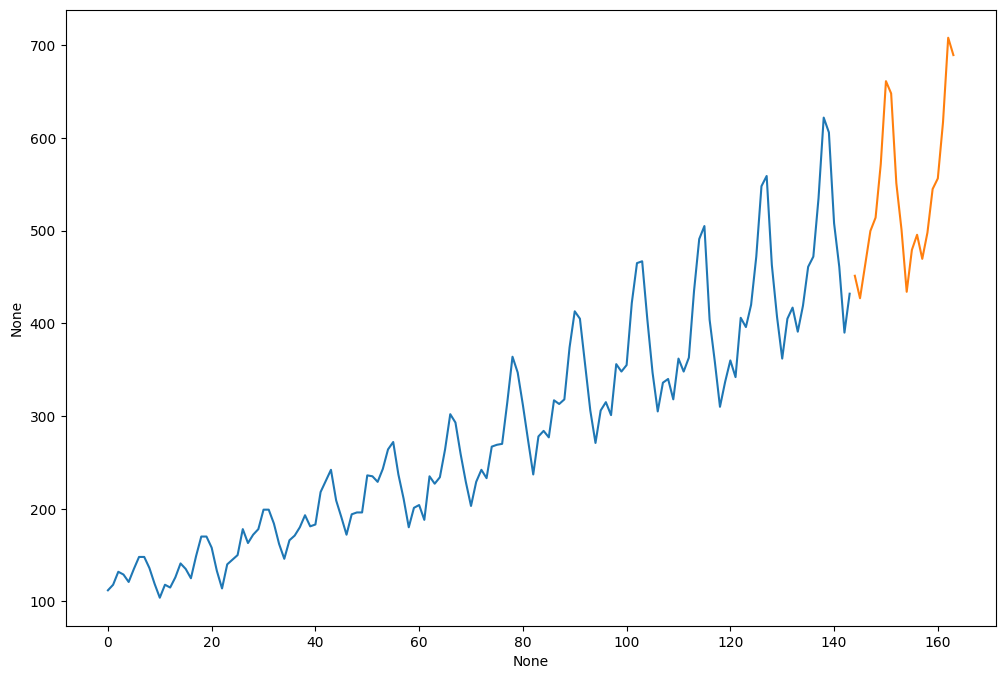

In [106]:
# 추세를 따라가고, 계절에 따른 값의 변화를 잘 예측하였다고 판단할 수 있다.

plt.figure(figsize = (12, 8))

sns.lineplot(x = passengers.index, y = passengers.values)
sns.lineplot(x = passengers_pred.index, y = passengers_pred)

plt.show()

In [108]:
# 결론 : 주식/퀀트 데이터는 ARIMA, SARIMA를 통해 예측하기 어렵고,
#        계절성이 있고, 정상성을 가지는 시계열 데이터에 한해서는
#        성능도 준수하고, 속도도 빠른 ARIMA 모형을 고려해 볼만 하다.
#        또는, 이평선을 포함한 Regression 모델, 딥러닝을 고려해볼 수 있다.